# Capstone Project - Traffic Sign Recognition Using Convolutional Neural Network

## Background

Reading traffic signs is an important component of autonomous driving. Autonomous cars need to be able to see the road signs just for the same reasons humans need them. They allow the driver to know the speed they should be traveling, where to stop, and what to be cautious of on the road ahead. Automotive companies could use traffic sign recognition as an aid to human-driven cars as well. Sometimes a human driver can miss a sign alerting them to an upcoming curve or a speed limit change, and the car could remind the driver if it doesn't sense proper responses to signage.

The data to be used for this project comes from the Institute for Neuroinformatik.  It contains 39,000 training images and 12,000 test images of 43 classes of German traffic signs.  The images are 32 x 32 pixels and have 3 color channels. This data can be accessed at the INI website at http://benchmark.ini.rub.de/?section=gtsrb&subsection=news.


## Load and Inspect Data

In [1]:
# Load Required Packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pickle
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import pandas as pd
from sklearn.utils import shuffle

In [2]:
# Load pickled Data
training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
# Summarize Data
n_train = len(X_train)
n_test = len(X_test)

image_shape = (X_train[0].shape)

unique, index, counts = np.unique(y_train, return_index = True, return_counts=True)

n_classes = len(unique)

print("Number of training examples:", n_train)
print("Number of testing examples: ", n_test)
print("Image data shape:           ", image_shape)
print("Number of classes:          ", n_classes)

Number of training examples: 39209
Number of testing examples:  12630
Image data shape:            (32, 32, 3)
Number of classes:           43


#### Plot Examples of Each Class

I'll define a function `plot_class_examples` that will plot 10 samples from each class in the training data.

In [4]:
def plot_class_examples(x, y):

    import random
    classes, counts = np.unique(y, return_counts=True)
    num_classes = len(classes)
    image_shape = x[0].shape
    num_channel = image_shape[2]
    sign_class_names = pd.read_csv("sign_class_names.csv").values[:, 1]
    col_width = max(len(name) for name in sign_class_names)

    for i in range(num_classes):
        #Creates boolean array of image set
        indexes = y == i   
        # Count total number of samples per class for each iteration
        count = np.sum(indexes)
        # Creates a 4d numpy array of the iteration's class
        x_samples = x[indexes]
        #Count number of images in class and print, bring in class names
        class_count = len(x_samples)
        print("Class %i: %-*s  %s samples" % (i, col_width, sign_class_names[i], str(class_count)))
        
        # Plot 10 random images from class
        fig = plt.figure(figsize = (6, 1))
        fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
        random_indices = random.sample(range(class_count), 10)
        
        for i in range(10):
            if num_channel == 1:
                axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
                axis.imshow(x_samples[random_indices[i]].reshape(32,32), cmap = 'gray')
            else:
                axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
                axis.imshow(x_samples[random_indices[i]].reshape(32,32,num_channel))
            
        plt.show()
        print("______________________________________________________________________________________\n")

Class 0: Speed limit  (20km/h)                               210 samples


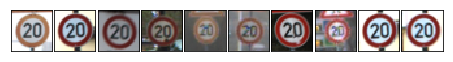

______________________________________________________________________________________

Class 1: Speed limit  (30km/h)                               2220 samples


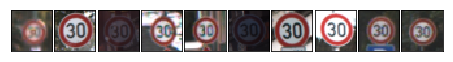

______________________________________________________________________________________

Class 2: Speed limit  (50km/h)                               2250 samples


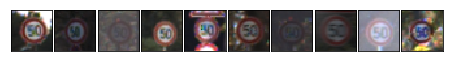

______________________________________________________________________________________

Class 3: Speed limit  (60km/h)                               1410 samples


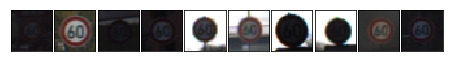

______________________________________________________________________________________

Class 4: Speed limit  (70km/h)                               1980 samples


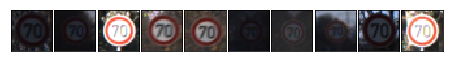

______________________________________________________________________________________

Class 5: Speed limit  (80km/h)                               1860 samples


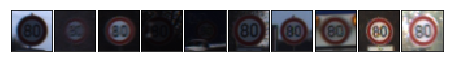

______________________________________________________________________________________

Class 6: End of speed limit  (80km/h)                        420 samples


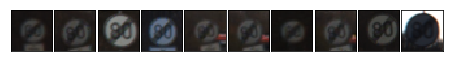

______________________________________________________________________________________

Class 7: Speed limit  (100km/h)                              1440 samples


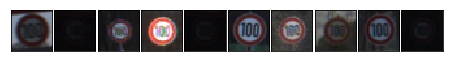

______________________________________________________________________________________

Class 8: Speed limit  (120km/h)                              1410 samples


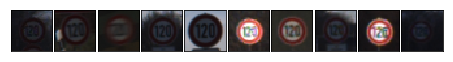

______________________________________________________________________________________

Class 9: No passing                                          1470 samples


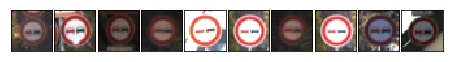

______________________________________________________________________________________

Class 10: No passing for vehicles over 3.5 metric tons        2010 samples


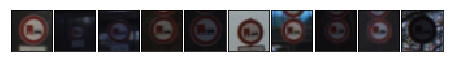

______________________________________________________________________________________

Class 11: Right-of-way at the next intersection               1320 samples


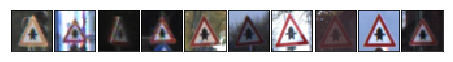

______________________________________________________________________________________

Class 12: Priority road                                       2100 samples


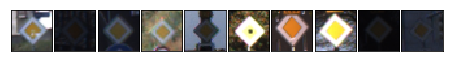

______________________________________________________________________________________

Class 13: Yield                                               2160 samples


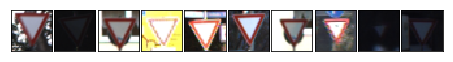

______________________________________________________________________________________

Class 14: Stop                                                780 samples


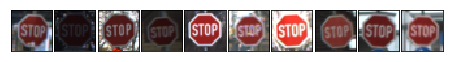

______________________________________________________________________________________

Class 15: No vehicles                                         630 samples


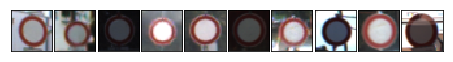

______________________________________________________________________________________

Class 16: Vehicles over 3.5 metric tons prohibited            420 samples


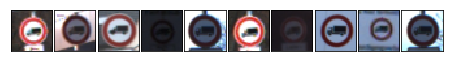

______________________________________________________________________________________

Class 17: no entry                                            1110 samples


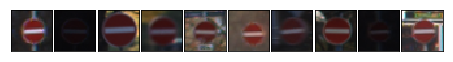

______________________________________________________________________________________

Class 18: general caution                                     1200 samples


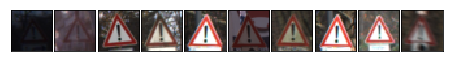

______________________________________________________________________________________

Class 19: Dangerous curve to the left                         210 samples


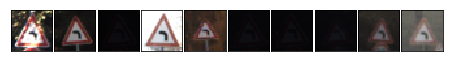

______________________________________________________________________________________

Class 20: Dangerous curve to the right                        360 samples


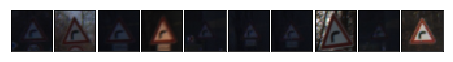

______________________________________________________________________________________

Class 21: Double Curve                                        330 samples


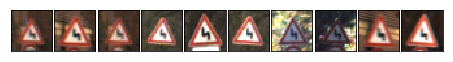

______________________________________________________________________________________

Class 22: Bumpy road                                          390 samples


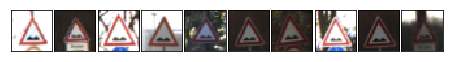

______________________________________________________________________________________

Class 23: Slippery road                                       510 samples


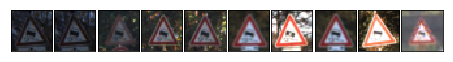

______________________________________________________________________________________

Class 24: Road narrows on the right                           270 samples


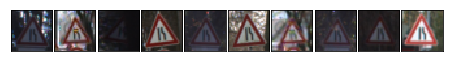

______________________________________________________________________________________

Class 25: Road work                                           1500 samples


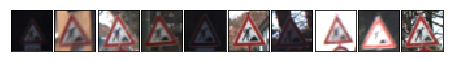

______________________________________________________________________________________

Class 26: Traffic signals                                     600 samples


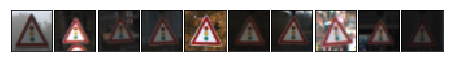

______________________________________________________________________________________

Class 27: Pedestrians                                         240 samples


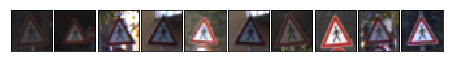

______________________________________________________________________________________

Class 28: Childen crossing                                    540 samples


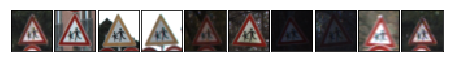

______________________________________________________________________________________

Class 29: Bicycles crossing                                   270 samples


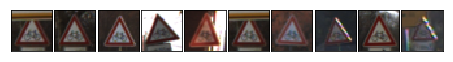

______________________________________________________________________________________

Class 30: Beware of ice/snow                                  450 samples


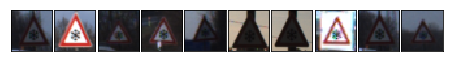

______________________________________________________________________________________

Class 31: Wild animals crossing                               780 samples


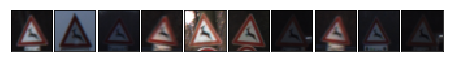

______________________________________________________________________________________

Class 32: End of all speed and passing limits                 240 samples


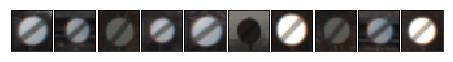

______________________________________________________________________________________

Class 33: Turn right ahead                                    689 samples


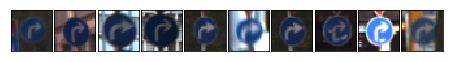

______________________________________________________________________________________

Class 34: Turn left ahead                                     420 samples


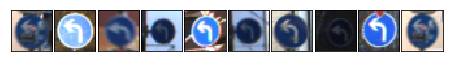

______________________________________________________________________________________

Class 35: Ahead Only                                          1200 samples


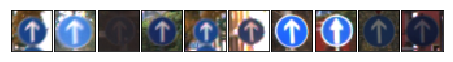

______________________________________________________________________________________

Class 36: Go stright or right                                 390 samples


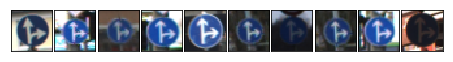

______________________________________________________________________________________

Class 37: Go straight or left                                 210 samples


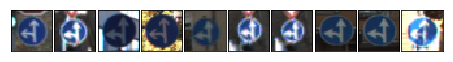

______________________________________________________________________________________

Class 38: Keep right                                          2070 samples


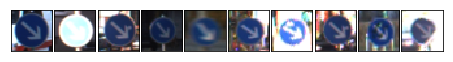

______________________________________________________________________________________

Class 39: Keep left                                           300 samples


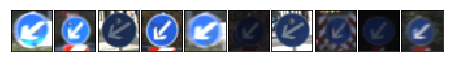

______________________________________________________________________________________

Class 40: Roundabout mandatory                                360 samples


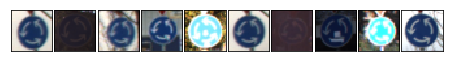

______________________________________________________________________________________

Class 41: End of no passing                                   240 samples


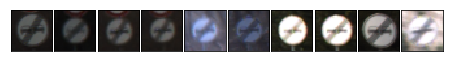

______________________________________________________________________________________

Class 42: End of no passing by vehicles over 3.5 metric tons  240 samples


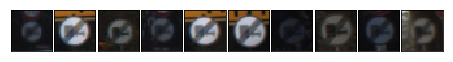

______________________________________________________________________________________



In [5]:
plot_class_examples(X_train, y_train)

There is not a lot of training data, especially given the number of classes. Several classes only have a few hundred training images.

The images appear to be well centered, with small degrees of rotation present. 

There is a large variation in brightness, with some images looking washed out, and others almost too dark to recognize.

## Data Preprocessing

I will take some initial image data preprocessing steps.  I will convert the images to grayscale, create some additional training images, and perform histogram equalization.

#### Convert to Grayscale

The images have three color channels, but many of the signs use the same color schemes and there is a higher variety of colors in the backgrounds than in the signs themselves, which may just add noise.  I will convert the images to grayscale for the initial modeling.

In [6]:
# Saving the 3-channel data in case it is needed later.
X_train_3c = X_train
X_test_3c = X_test

Next I will define a function `rbg_to_gray` that will convert the 3-color image arrays into grayscale, then convert the data to grayscale.

In [7]:
def rgb_to_gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114]).reshape((-1,32,32,1))
    

X_train = rgb_to_gray(X_train)
X_test = rgb_to_gray(X_test)

print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

(39209, 32, 32, 1) float64
(12630, 32, 32, 1) float64


The last dimension is now 1 for the datasets, indicating a single grayscale color channel.

#### Class Imbalance

There are 34,770 training images.  First I'll to plot the number of images by class to see how imbalanced the classes are.

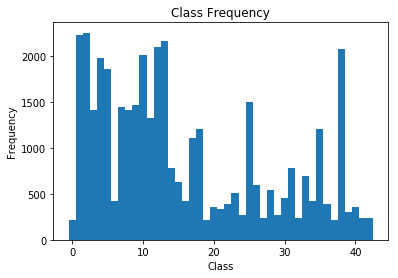

Maximum Class Count:  2250
Minimum Class Count:  210


In [8]:
n_classes, index, counts = np.unique(y_train, return_index = True, return_counts=True)

plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

print("Maximum Class Count: ", max(counts))
print("Minimum Class Count: ", min(counts))

There are quite a few classes with fewer than 500 training images, with some having as few as 180.  I tried training hte model with the data as is, and it performs fiarly well, but I think it would still benefit from having even numbers of samples from each class.  This way, it will learn them at more equal rates, since it might take several iterations before some of the lower-frequency images happen to get selected in the training bacth.

To generate additional training images, I will define a function to resample the under-represented classes. I will sample the existing data with replacement, and for each new sample I will add a random rotation between -5 and +5 degrees.

#### Generate Additional Training Data

In [9]:
from scipy.ndimage import rotate

def generate_additional_data_rotate(x, y, angle):
    """Takes 4d numpy array of images x and class labels y,
    determines how many additional images per class to generate so that
    all classes have the same number of images, then generates additional
    images with rotation specified"""
    
    # Calculate number of classes and and image counts for classes
    classes, counts = np.unique(y, return_counts=True)
    num_classes = len(classes)
    # Determine maximum class count
    max_class_count = max(counts)
    
    # Calculate number of new images needed to give all classes an image count
    # equal to that of the class with the highest count
    num_samples = len(x)
    num_new_images = int((num_classes * max_class_count) - num_samples)
    
    # Create empty numpy arrays to fill with new images and labels
    x_additional = np.empty(shape = (num_new_images,32,32,1))
    y_additional = np.empty(shape = (num_new_images,))
    
    # Initialize index to iterate over for new array
    new_array_index = 0
    
    # Iterate over each class
    for i in range(num_classes):
        
        #Boolean array of input, True if this class
        indexes = y == i   
        
        # Total image count for this class
        count = np.sum(indexes)  
        
        #Create a 4d numpy array of the iteration's class
        x_train_samples = x[indexes]  
        
        # creates 1d array of iteration's class 
        y_train_samples = y[indexes]
        
        # Calculate  number of new samples to generate 
        num_new_samples = max_class_count - count
        
        # Loop over number of new samples for each class
        for i in range(num_new_samples):
            
            # Pulls a random number from number of images in class
            sample_index = np.random.choice(count)
            # Creates a sample image
            x_sample = x_train_samples[sample_index]
            # Create a random angle +- angle input
            random_angle = (angle * 2) * np.random.random_sample(1) - angle
            # Create new image adding rotation to sample image.
            x_new = rotate(x_sample, random_angle, axes=(0,1), reshape=False, mode = 'nearest')
            # Create new label
            y_new = y_train_samples[0].reshape(1,)
            #adds new image to next spot in empty array
            x_additional[new_array_index] = x_new
            #adds new label to next spot in empty array
            y_additional[new_array_index] = y_new
            # reset new_arraw_inex to next empty spot
            new_array_index += 1

    return x_additional, y_additional

In [10]:
# Generate additional training images.
X_train_new, y_train_new = generate_additional_data_rotate(X_train, y_train, 5)

In [11]:
# Add generated images and labels to existing data.
X_train = np.concatenate((X_train, X_train_new))
y_train = np.concatenate((y_train, y_train_new))

In [12]:
# Calculate some summary information for the data
n_train = len(X_train)
n_test = len(X_test)

image_shape = (X_train[0].shape)
img_size = (X_train[0].shape)

unique, index, counts = np.unique(y_train, return_index = True, return_counts=True)

n_classes = len(unique)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 96750
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


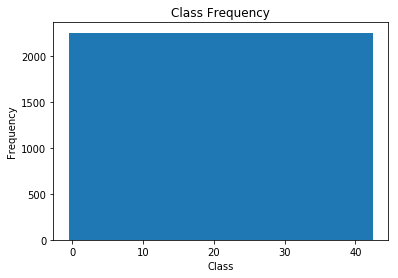

In [13]:
# plot class frequency agian to check for class balance
n_classes, index, counts = np.unique(y_train, return_index = True, return_counts=True)

plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Classes are now balanced, with 2010 images each.

#### Prepare Training Data for Modelling

In [14]:
# Convert to type uint8
X_train = X_train.astype(np.uint8)
y_train = y_train.astype(np.uint8)

In [15]:
# Function to convert labels into one hot array
def one_hot_array(nparray):
    one_hot_array = np.zeros((nparray.size, nparray.max()+1))
    one_hot_array[np.arange(nparray.size), nparray] = 1
    return one_hot_array

In [16]:
# Create one hot arrays for target variables
y_train_2 = one_hot_array(y_train)
y_test_2 = one_hot_array(y_test)

In [17]:
# Check to make sure the new arrays are the right shape.
print(y_train_2.shape, y_train_2.dtype)
print(y_test_2.shape, y_test_2.dtype)

(96750, 43) float64
(12630, 43) float64


In [18]:
# Create variables for image size, number of classes and channels which will be used in later functions.
img_size = X_train.shape[1]
num_classes = len(unique)
num_channels = X_train.shape[3]


## TensorFlow Graph Building Functions

I will create a series of helper functions to create new layers and initialize them with values. THis will allow new architectures to be able to be quickly built.

#### Functions to Generate New Weights and Biases

In [107]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

#### Function to Generate New Convolutional Layer

The function `new_conv_layer` takes the previous layer as input, the number of channels in the previous layer, filter size and number of filters, as well as the option to use pooling. The output is a 4D tensor with the following dimensions:

 - image number
 - y-axis of each image
 - x-axis of each image
 - channnels of each image

In [108]:
def new_conv_layer(input,
                   num_input_channels,
                   filter_size,
                   num_filters,
                   use_pooling=True):
    
    # Shape of the filters and weights as needed for TensorFlow
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Creates new weights of the correct chape using new_weights function
    weights = new_weights(shape=shape)

    # Creates new biases with one for each filter.
    biases = new_biases(length=num_filters)

    # Create Tensorflow  2D Convolutional layer
    layer = tf.nn.conv2d(input=input, filter=weights, strides=[1, 1, 1, 1], padding='SAME')

    # Add biases to the layer
    layer += biases

    # 2 x 2 pooling to down-sample image resolution (Optional)
    if use_pooling:
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Function to apply to output.    
    layer = tf.nn.relu(layer)

    return layer, weights

#### Function to Create Flattenening Later

The ouptut tensors produced by the convolutional layers are 4D.  This helper function will reduce the 4D tensors to 2D tensors, which can be used in the following fully connected layers. The two dimensions in the flattened later are:

 - Number of images
 - Number of imputs

In [109]:
# Turns 4D output into 2D

def new_flatten_layer(layer):
    # Get shape of input layer
    layer_shape = layer.get_shape()
    
    # TensorFlow function to get number of features
    num_features = layer_shape[1:4].num_elements()
    
    # Use reshape to flatten
    layer_flat = tf.reshape(layer, [-1, num_features])
    
    # Return the flattened layer and the number of features
    return layer_flat, num_features

#### Function to Create New Fully Connected later

The fully connected layers will help fine non-linear combinations of the high-level feature output from the convolutional layers. The input is the 2D tensor output from the flattening array, and the output is a 2D tensor with the following dimensions:

 - Number of images
 - Number of outputs

In [110]:
def new_fully_conn_layer(input,
                         num_inputs,
                         num_outputs,
                         use_relu = True):
    # New weights and biases
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate layer as a matrix multiplication of the input and weights,
    # and add the biases.
    layer = tf.matmul(input, weights) + biases

    #option to use relu(not used on final output layer).
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

## Placeholder Variables

Placeholder variables are used in Tensorflow inputs that change each time the computational graph is exectuted. For example, the input images will be different each time the graph is used since it will be trained using random batches.

In [111]:
# For input images
x = tf.placeholder(tf.float32, shape=[None, img_size, img_size, 1], name='x')
# Image needs to be reshaped, since the convolutional layers expect 4D tensors
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

# Placeholder variable for the true labels associated with images in input placeholder variable x.
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

# TensorFlow operator that will be used to predict the true class number.
y_true_class = tf.argmax(y_true, axis=1)

## Additional Functions for Running Tensorflow

#### Optimizer Function

This is the function that will train the neural network. Due to the number of training images, the optimize function will only will pull a random sample of images for each training iteration, feed them through the neural network and update the weights. This function can be called multiple times and run a specified number of iterations, which will update the total number of iterations ran. When it is ran, it will also display how much time it takes.

In [112]:
# Counter to count how many optimization iterations have been ran.
total_iterations = 0

def optimize(num_iterations):
    # To update the the global variable rather than local copy
    global total_iterations
    
    # Number of training images.
    num_examples = len(X_train)
    # To calculate runtime
    start_time = time.time()
    
    # Loop over the number of training iterations specified in the function call.
    for i in range(total_iterations, total_iterations + num_iterations):
        
        # Shuffle the data to pull a random sample size from
        x_batch, y_true_batch = shuffle(X_train,y_train_2)
        
        # Create a batch based on the train_batch_size
        batch_x, batch_y = x_batch[0 : train_batch_size], y_true_batch[0 : train_batch_size]
            
        # Create feed dict for Tensorflow session
        feed_dict_train = {x: batch_x,
                          y_true: batch_y}
        
        # Run session, 
        session.run(optimizer, feed_dict=feed_dict_train)
        
        # To print a message every 100 iterations
        if i % 100 == 0:
            acc = session.run(accuracy, feed_dict=feed_dict_train)
            
            message = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"
            
            print(message.format(i + 1, acc))
    
    # Update total_iterations counter
    total_iterations += num_iterations
    
    # To calculate runtime
    end_time = time.time()
    
    # Calculate runtime
    time_diff = end_time - start_time
    
    print("Time usage: " + str(timedelta(seconds=int(round(time_diff)))))

#### Function to Print Test Accuracy

The `print_test_accuracy` function can be called periodically to see how well the network is predicting the test data. There is an option to show examples of prediction errors and confusion matrix, which will use functions defined subsequently.

In [113]:
# Split the test-set into smaller batches of this size.
test_batch_size = 128

def print_test_accuracy(show_confusion_matrix=False,
                        show_class_recall=False,
                        show_class_precision=False):

    # Number of images in the test data.
    num_test = len(y_test)

    # Create array of zeros sized based on nuber of test images.
    class_pred = np.zeros(shape=num_test, dtype=np.int)

    # The starting index for the next batch denoted  as i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # images in test set between i and j
        images = X_test[i:j, :]

        # Labels in test set between i and j
        labels = y_test_2[i:j, :]

        # Create a feed dict for these images and labels
        feed_dict = {x: images,
                     y_true: labels}

        # Use TensorFlow to predict the class
        class_pred[i:j] = session.run(y_pred_class, feed_dict=feed_dict)

        # Update the index i to start at the next batch
        i = j

    # True class numbers from the test set    
    class_true = y_test 

    # Create a boolean array whether each image is correctly classified.
    correct = (class_true == class_pred)

    # Sum up the correctly classified images
    correct_sum = correct.sum()

    # Calculate the accuracy
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))
    
    # Plot confusion matrix, if called for
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(class_pred=class_pred)
    
    # Plot class recall, if called for
    if show_class_recall:
        plot_class_recall(class_pred=class_pred)
        
    # Plot class precision, if called for
    if show_class_precision:
        plot_class_precision(class_pred=class_pred)

#### Function to Plot Confusion Matrix

The plot confusion matrix is one of three functions that is called within the print test accuracy function to plot addicional metrics.  The plot_confusion_matrix function will plot the confusion matrix for all classes, using the raw numbers and not percentages.

In [115]:
def plot_confusion_matrix(class_pred):
    
    # Called in print_test_accuracy function
    
    # True classifications from the test data
    class_true  = y_test
    
    # sklearn to get confusion matrix
    cm = confusion_matrix(y_true=class_true,
                         y_pred=class_pred)
    
    # Build Confusion Matrix Plot
    plt.figure(figsize=(11,11))
    plt.matshow(cm, fignum=1)
    
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    
    plt.show()

#### Functions to Plot Class Recall and Precision

The functions plot_class_recall and plot_class_precision will create horizontal bar plots of the recall and precision, by class.

In [116]:
def plot_class_recall(class_pred):
    
    # Called in print_test_accuracy function
    
    # True classifications from the test data
    class_true  = y_test
    
    # sklearn to get confusion matrix
    cm = confusion_matrix(y_true=class_true,
                         y_pred=class_pred)
    
    # Create empty dictionary for class and recall
    class_recall = {}
    # Read in sign names data
    sign_class_names = pd.read_csv("sign_class_names.csv").values[:, 1]

    # Loop over each class to bring in class name and calculate recall
    for i in range(num_classes):
        # Calculate Recall for class
        recall = round(cm[i,i]/cm[i].sum(),4)*100
        # Bring in sign name for class
        cls = sign_class_names[i]
        # Create new dictionary of class name and value
        new_value = {cls:recall}
        # Add new dictionary value to empty dict class_recall
        class_recall.update(new_value)
    
    # Convert dict to pandas data frame
    class_recall = pd.DataFrame(list(class_recall.items()), columns = ['Class', 'Class Recall'])
    
    # Plot recall data frame
    class_recall.plot.barh(x = 'Class',
                           y = 'Class Recall',
                           color = 'blue',
                           title = 'Recall by Class',
                           figsize = (10,12))

In [117]:
def plot_class_precision(class_pred):
    
    # Called in print_test_accuracy function
    
    # True classifications from the test data    
    class_true  = y_test
    
    # sklearn to get confusion matrix
    cm = confusion_matrix(y_true=class_true,
                         y_pred=class_pred)
    
    # Create empty dictionary for class and precision
    class_precision = {}
    # Read in sign names data
    sign_class_names = pd.read_csv("sign_class_names.csv").values[:, 1]

    # Loop over each class to bring in class name and calculate precision
    for i in range(num_classes):
        # Calculate precision for class
        precision = round(cm[i,i]/cm[:,i].sum(),4)*100
        # Bring in sign name for class
        cls = sign_class_names[i]
        # Create new dictionary of class name and precision
        new_value = {cls:precision}
        # Add new dictionary value to empty dict class_precision
        class_precision.update(new_value)
    
    # COnvert dict to pandas data frame
    class_presicion = pd.DataFrame(list(class_precision.items()), columns = ['Class', 'Class Precision'])
    
    # Plot precision data frame
    class_presicion.plot.barh(x = 'Class',
                           y = 'Class Precision',
                           color = 'blue',
                           title = 'Precision by Class',
                           figsize = (10,12)) 

## Building the TensorFlow Graphs

### Architecture 1

The initial model architecture I used is based on the LeNet-5 architecture, which was originated in the 1990s for recognizing handwritten digits. The architechture includes 2 convolutional layers with 5x5 filters and pooling, followed by a flattening layer and 3 fully connected layers, the last of which is the output layer.

#### Hyperparameters

In [30]:
# Configuration of Neural Network

# Convolutional Layer 1
filter_size1 = 5
num_filters1 = 24

# Convolutional Layer 2
filter_size2 = 5
num_filters2 = 64

# Fully Connected Layer 1
fc_size = 768

# Fully Connected Layer 2
fc2_size = 512

# Fully Connected Layer 3 - Output
fc3_size = 43

# Train Batch Size
train_batch_size = 64

# Learning Rate
learning_rate = 0.0001

####  Building Model Architecture 1

In [31]:
# Convolutional Layer 1
conv_layer_1, conv_weights_1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)


# Convolutional Layer 2
conv_layer_2, conv_weights_2 = \
    new_conv_layer(input=conv_layer_1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)


# Flattening Layer
layer_flat, num_features = new_flatten_layer(conv_layer_2)


# Fully Connected Layer 1
fully_conn_layer_1 = new_fully_conn_layer(input=layer_flat,
                                          num_inputs=num_features,
                                          num_outputs=fc_size,
                                          use_relu=True)

# Fully Connected Layer 2
fully_conn_layer_2 = new_fully_conn_layer(input=fully_conn_layer_1,
                                          num_inputs=fc_size,
                                          num_outputs=fc2_size,
                                          use_relu=True)

# Fully Connected Layer 3 - Output Layer
fully_conn_layer_3 = new_fully_conn_layer(input= fully_conn_layer_2,
                                          num_inputs=fc2_size,
                                          num_outputs=fc3_size,
                                          use_relu=False)

# Predicted Class
y_pred = tf.nn.softmax(fully_conn_layer_3)
y_pred_class = tf.argmax(y_pred, axis=1)


# Cost Function to be Optimazed - Softmax Cross Entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=fully_conn_layer_3,
                                                       labels=y_true)
cost = tf.reduce_mean(cross_entropy)


# Optimization Method - Adam Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


# Performance Measures
correct_prediction = tf.equal(y_pred_class, y_true_class)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


print("Conv Layer 1:       ", conv_layer_1)
print("Conv Layer 2:       ", conv_layer_2)
print("Flatten Layer:      ", layer_flat)
print("Fully Conn Layer 1: ", fully_conn_layer_1)
print("Fully Conn Layer 2: ", fully_conn_layer_2)
print("Fully Conn Layer 3: ", fully_conn_layer_3)
print("Preicted Class:     ", y_pred_class)
print("Cost Function:      ", cost)

Conv Layer 1:        Tensor("Relu:0", shape=(?, 16, 16, 24), dtype=float32)
Conv Layer 2:        Tensor("Relu_1:0", shape=(?, 8, 8, 64), dtype=float32)
Flatten Layer:       Tensor("Reshape_1:0", shape=(?, 4096), dtype=float32)
Fully Conn Layer 1:  Tensor("Relu_2:0", shape=(?, 768), dtype=float32)
Fully Conn Layer 2:  Tensor("Relu_3:0", shape=(?, 512), dtype=float32)
Fully Conn Layer 3:  Tensor("add_4:0", shape=(?, 43), dtype=float32)
Preicted Class:      Tensor("ArgMax_1:0", shape=(?,), dtype=int64)
Cost Function:       Tensor("Mean:0", shape=(), dtype=float32)


## Run TensorFlow

In [32]:
session = tf.Session()
session.run(tf.global_variables_initializer())

### Begin Training Iterations - 1st Architecture

#### 100 Iterations

In [33]:
optimize(num_iterations=100)

Optimization Iteration:      1, Training Accuracy:   0.0%
Time usage: 0:00:50


Accuracy on Test-Set: 18.9% (2385 / 12630)
Confusion Matrix:


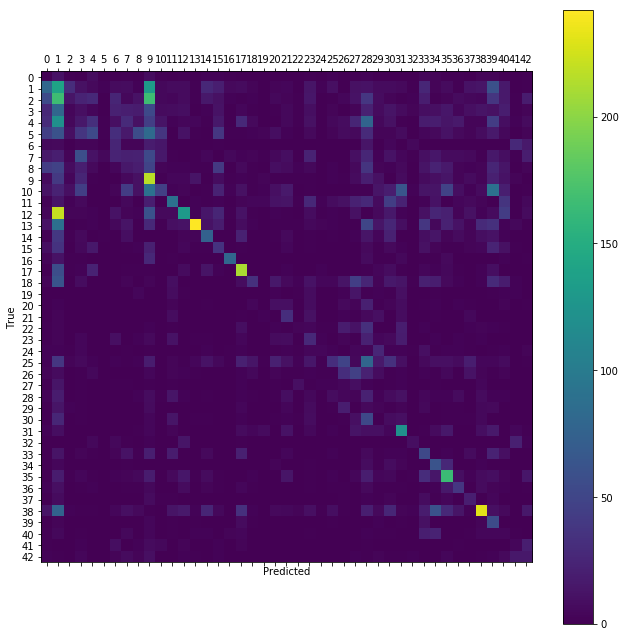

Total Iterations:  100


In [34]:
print_test_accuracy(show_confusion_matrix=True)
print("Total Iterations: ", total_iterations)

Even after only 100 training iterations, a faint diagonal line is starting to form in the confusion matrix, showing that it is already learning to make some correct predictions. Next I will see how things look after 1000 iterations.

#### 1000 Iterations

In [35]:
optimize(num_iterations=900)

Optimization Iteration:    101, Training Accuracy:  25.0%
Optimization Iteration:    201, Training Accuracy:  50.0%
Optimization Iteration:    301, Training Accuracy:  65.6%
Optimization Iteration:    401, Training Accuracy:  75.0%
Optimization Iteration:    501, Training Accuracy:  84.4%
Optimization Iteration:    601, Training Accuracy:  82.8%
Optimization Iteration:    701, Training Accuracy:  85.9%
Optimization Iteration:    801, Training Accuracy:  90.6%
Optimization Iteration:    901, Training Accuracy:  90.6%
Time usage: 0:07:20


Accuracy on Test-Set: 68.9% (8697 / 12630)
Confusion Matrix:


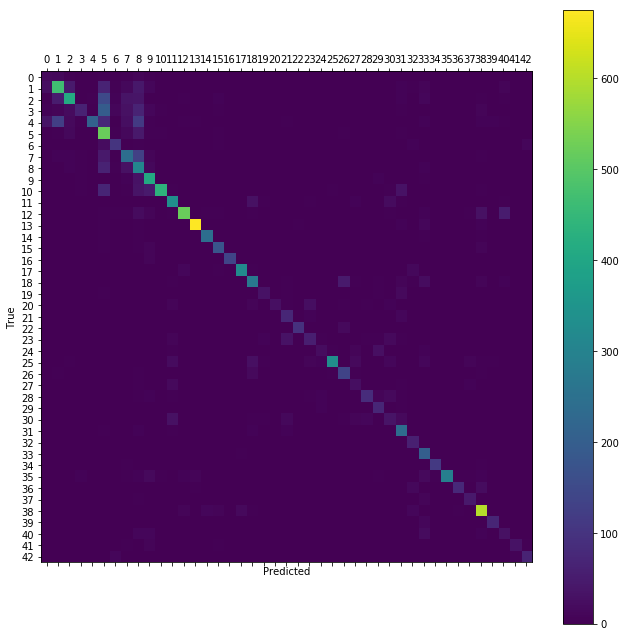

Total Iterations:  1000


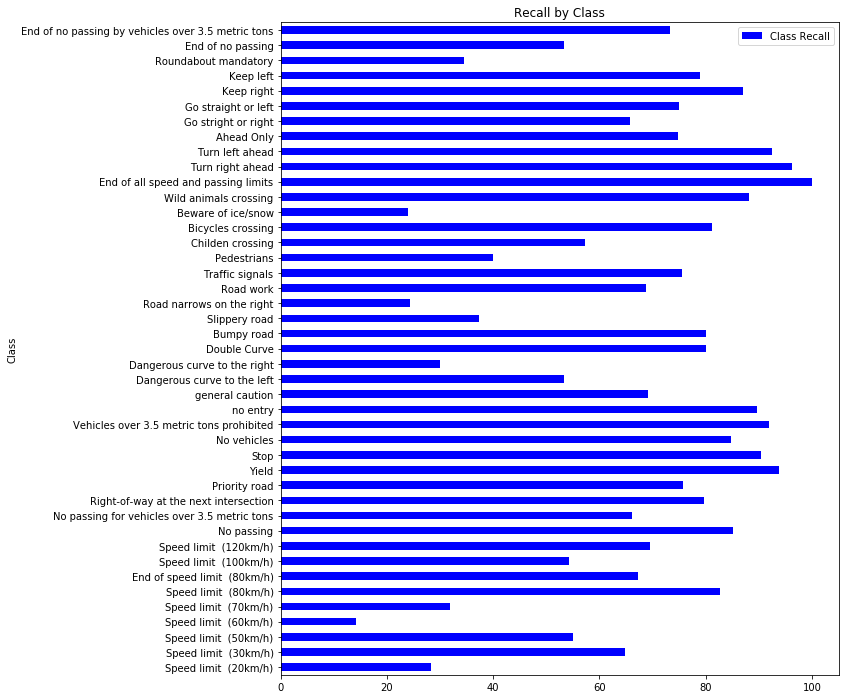

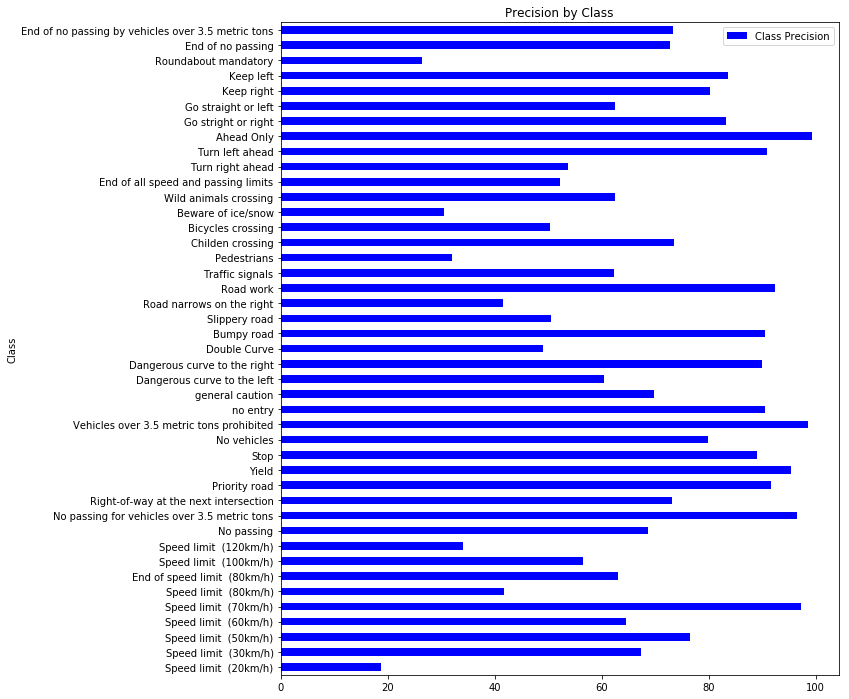

In [37]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

After 1,000 iterations, the accuracy has increased to about 69%, and the diagonal line on the confusion matrix plot is much more pronounced.  There appear to be more misclassifications in classes 0-8, which are the speed limit signs that are similar to each other other than the speed number posted on the sign.

Next I'll run an additional 4,000 iterations and see how things look after a total of 5,000 iterations.

#### 5000 Iterations

In [38]:
optimize(num_iterations=4000)

Optimization Iteration:   1001, Training Accuracy:  87.5%
Optimization Iteration:   1101, Training Accuracy:  92.2%
Optimization Iteration:   1201, Training Accuracy:  90.6%
Optimization Iteration:   1301, Training Accuracy:  92.2%
Optimization Iteration:   1401, Training Accuracy:  93.8%
Optimization Iteration:   1501, Training Accuracy:  92.2%
Optimization Iteration:   1601, Training Accuracy:  98.4%
Optimization Iteration:   1701, Training Accuracy:  93.8%
Optimization Iteration:   1801, Training Accuracy:  93.8%
Optimization Iteration:   1901, Training Accuracy:  92.2%
Optimization Iteration:   2001, Training Accuracy:  93.8%
Optimization Iteration:   2101, Training Accuracy:  95.3%
Optimization Iteration:   2201, Training Accuracy:  98.4%
Optimization Iteration:   2301, Training Accuracy:  95.3%
Optimization Iteration:   2401, Training Accuracy: 100.0%
Optimization Iteration:   2501, Training Accuracy:  98.4%
Optimization Iteration:   2601, Training Accuracy:  98.4%
Optimization I

Accuracy on Test-Set: 85.9% (10849 / 12630)
Confusion Matrix:


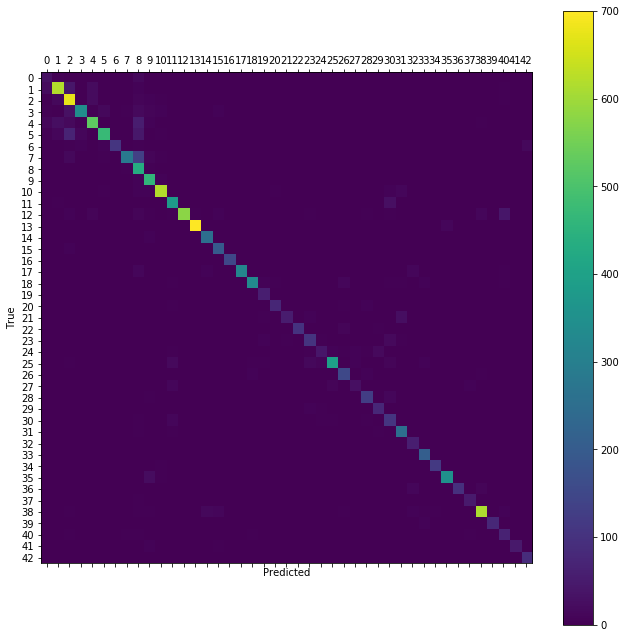

Total Iterations:  5000


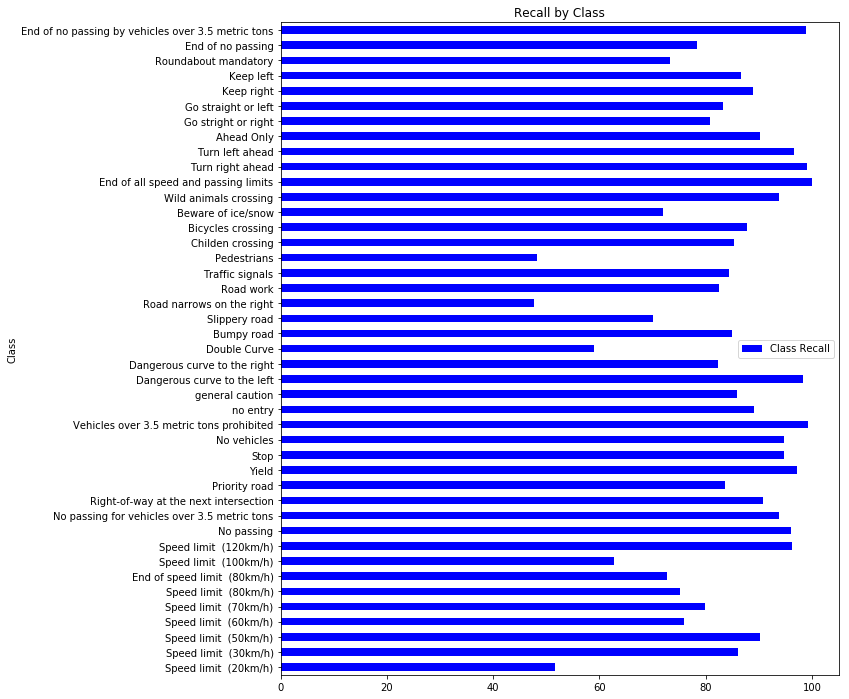

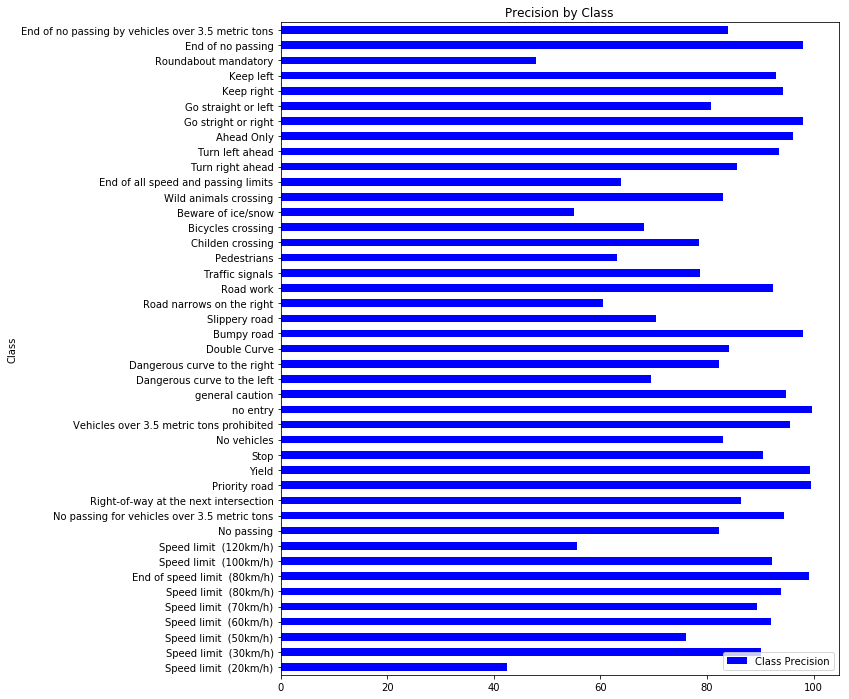

In [40]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

After 5,000 training iterations, the training accuracy is nearing 100%, and the test accuracy has improved to 85.9%.

While the overall accuracy has improved, there are still several classes with low precision and recall scores.

Next I will see how well the model performs after a total of 10,000 iterations.

#### 10000 Iterations

In [43]:
optimize(num_iterations=5000)

Optimization Iteration:   5001, Training Accuracy: 100.0%
Optimization Iteration:   5101, Training Accuracy: 100.0%
Optimization Iteration:   5201, Training Accuracy: 100.0%
Optimization Iteration:   5301, Training Accuracy: 100.0%
Optimization Iteration:   5401, Training Accuracy: 100.0%
Optimization Iteration:   5501, Training Accuracy: 100.0%
Optimization Iteration:   5601, Training Accuracy:  98.4%
Optimization Iteration:   5701, Training Accuracy: 100.0%
Optimization Iteration:   5801, Training Accuracy: 100.0%
Optimization Iteration:   5901, Training Accuracy: 100.0%
Optimization Iteration:   6001, Training Accuracy: 100.0%
Optimization Iteration:   6101, Training Accuracy: 100.0%
Optimization Iteration:   6201, Training Accuracy: 100.0%
Optimization Iteration:   6301, Training Accuracy: 100.0%
Optimization Iteration:   6401, Training Accuracy:  96.9%
Optimization Iteration:   6501, Training Accuracy: 100.0%
Optimization Iteration:   6601, Training Accuracy: 100.0%
Optimization I

Accuracy on Test-Set: 90.6% (11445 / 12630)
Confusion Matrix:


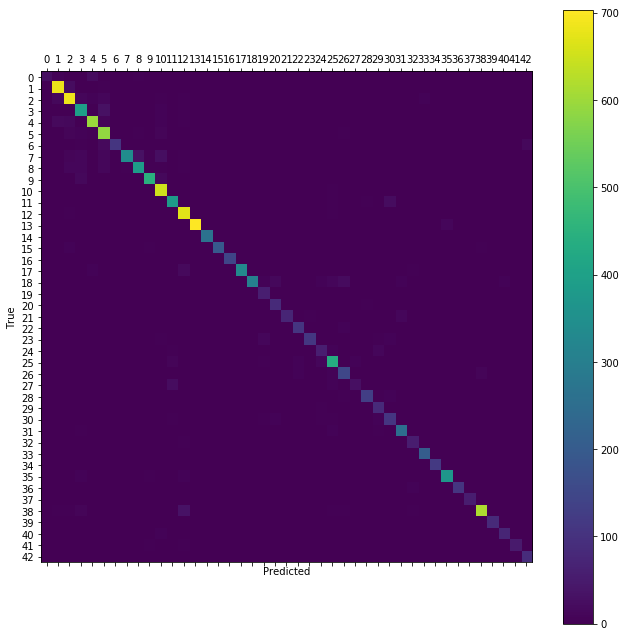

Total Iterations:  10000


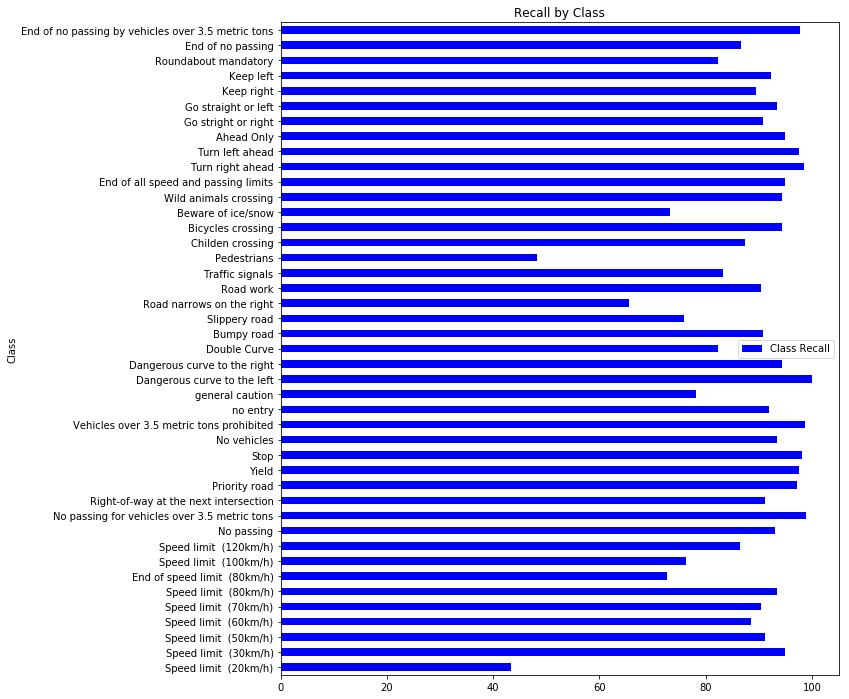

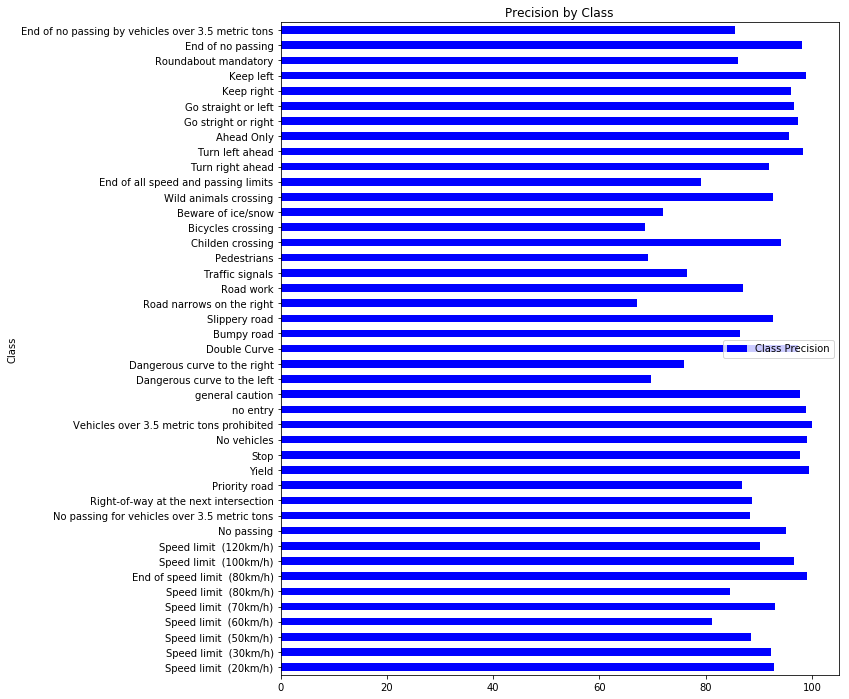

In [44]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

The rate of improvement has slowed down a lot, but it is still improving, with a test accuracy of 90.6 % after 10,000 iterations. The class "pedestrians" still has a low recall , and there are several with precision under 80%.  I'll run another 20,000 iterations.

#### 20000 Iterations

In [45]:
optimize(num_iterations=10000)

Optimization Iteration:  10001, Training Accuracy: 100.0%
Optimization Iteration:  10101, Training Accuracy: 100.0%
Optimization Iteration:  10201, Training Accuracy: 100.0%
Optimization Iteration:  10301, Training Accuracy: 100.0%
Optimization Iteration:  10401, Training Accuracy: 100.0%
Optimization Iteration:  10501, Training Accuracy: 100.0%
Optimization Iteration:  10601, Training Accuracy: 100.0%
Optimization Iteration:  10701, Training Accuracy: 100.0%
Optimization Iteration:  10801, Training Accuracy: 100.0%
Optimization Iteration:  10901, Training Accuracy: 100.0%
Optimization Iteration:  11001, Training Accuracy: 100.0%
Optimization Iteration:  11101, Training Accuracy: 100.0%
Optimization Iteration:  11201, Training Accuracy: 100.0%
Optimization Iteration:  11301, Training Accuracy: 100.0%
Optimization Iteration:  11401, Training Accuracy: 100.0%
Optimization Iteration:  11501, Training Accuracy: 100.0%
Optimization Iteration:  11601, Training Accuracy: 100.0%
Optimization I

Accuracy on Test-Set: 92.9% (11728 / 12630)
Confusion Matrix:


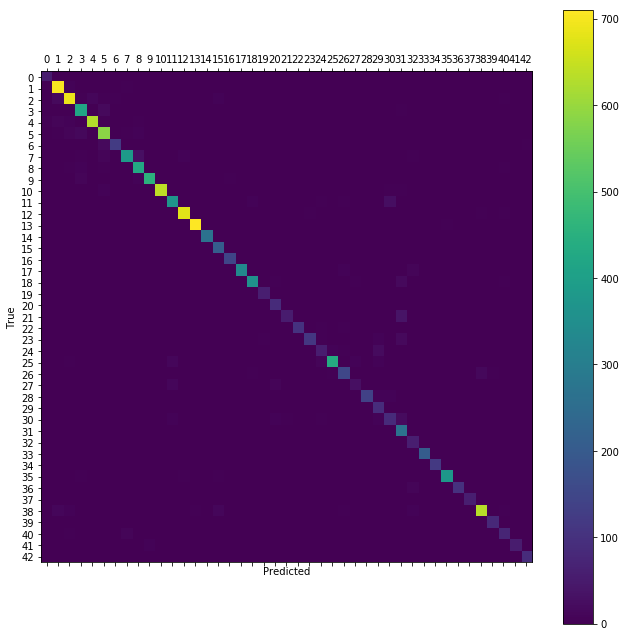

Total Iterations:  20000


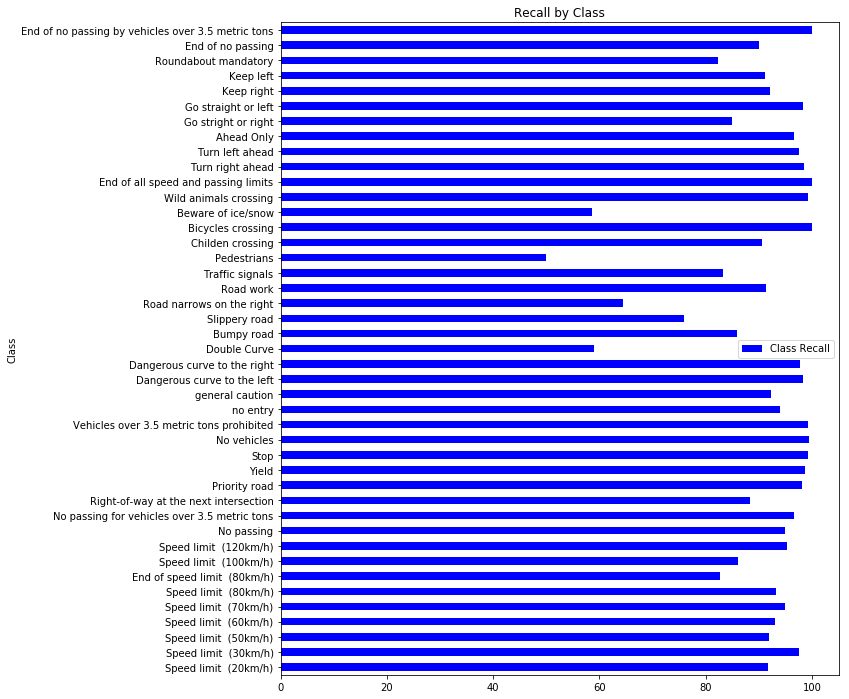

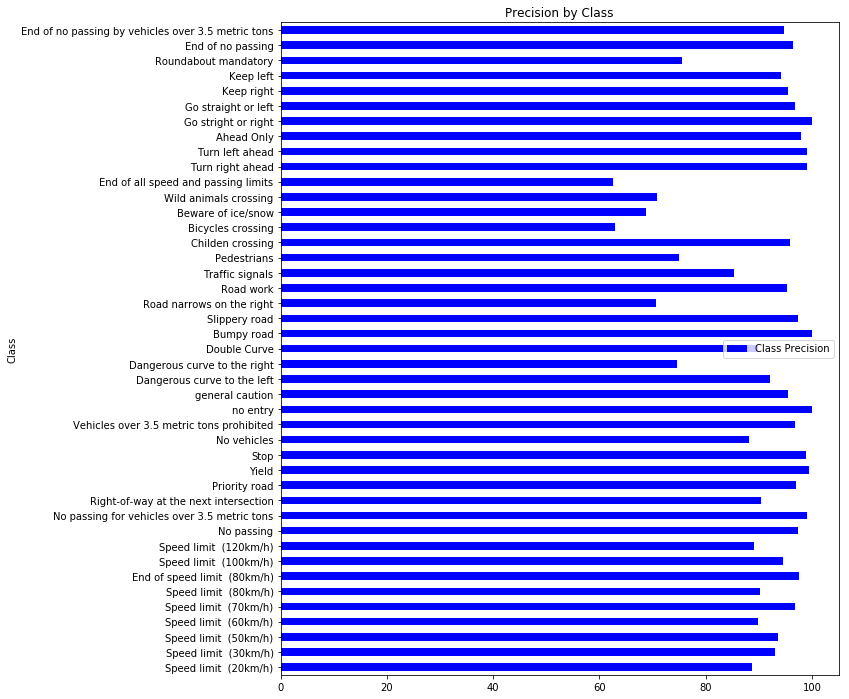

In [46]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

Still improving, with an test accuracy of 92.9%

#### 30000 Iterations

In [47]:
optimize(num_iterations=10000)

Optimization Iteration:  20001, Training Accuracy: 100.0%
Optimization Iteration:  20101, Training Accuracy: 100.0%
Optimization Iteration:  20201, Training Accuracy: 100.0%
Optimization Iteration:  20301, Training Accuracy: 100.0%
Optimization Iteration:  20401, Training Accuracy: 100.0%
Optimization Iteration:  20501, Training Accuracy: 100.0%
Optimization Iteration:  20601, Training Accuracy: 100.0%
Optimization Iteration:  20701, Training Accuracy: 100.0%
Optimization Iteration:  20801, Training Accuracy: 100.0%
Optimization Iteration:  20901, Training Accuracy: 100.0%
Optimization Iteration:  21001, Training Accuracy: 100.0%
Optimization Iteration:  21101, Training Accuracy: 100.0%
Optimization Iteration:  21201, Training Accuracy: 100.0%
Optimization Iteration:  21301, Training Accuracy: 100.0%
Optimization Iteration:  21401, Training Accuracy: 100.0%
Optimization Iteration:  21501, Training Accuracy: 100.0%
Optimization Iteration:  21601, Training Accuracy: 100.0%
Optimization I

Accuracy dropped a little, down to 91.9.  I'll run 10,000 more iterations but It seems to be reaching its peak.

Accuracy on Test-Set: 91.9% (11613 / 12630)
Confusion Matrix:


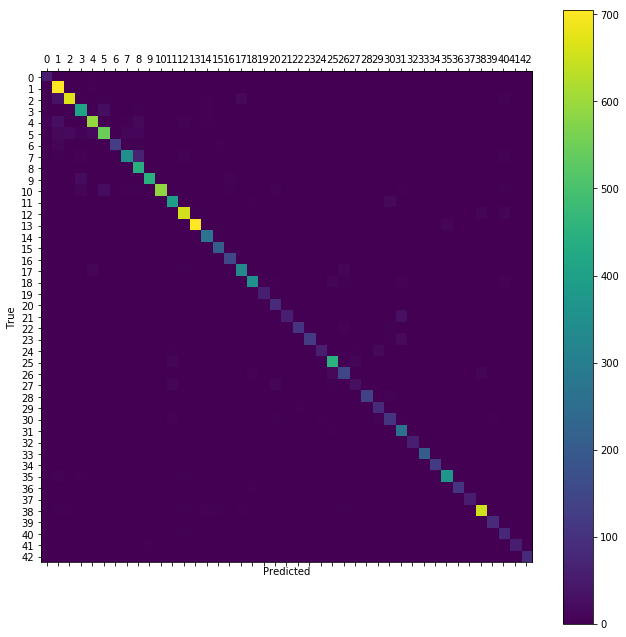

Total Iterations:  30000


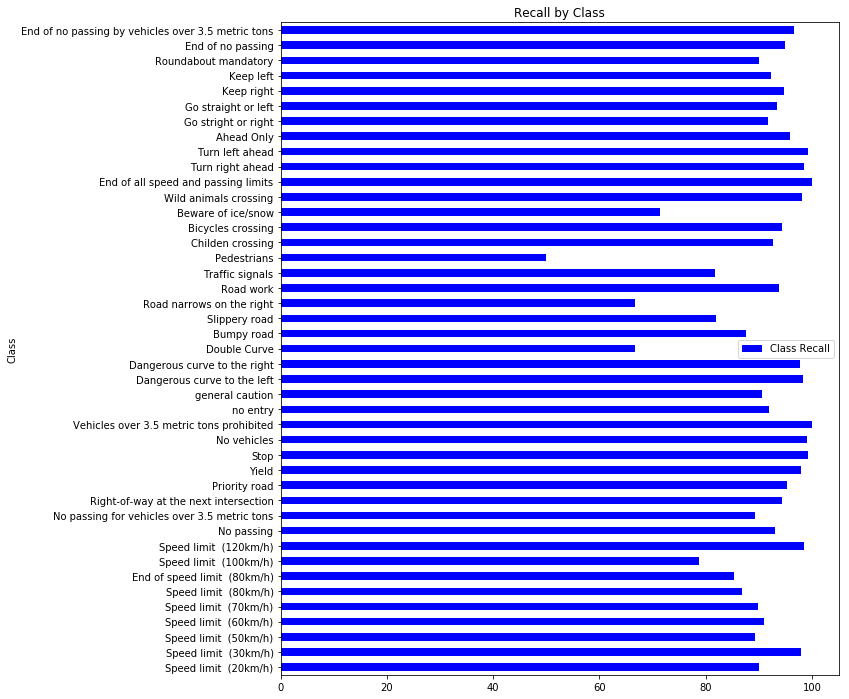

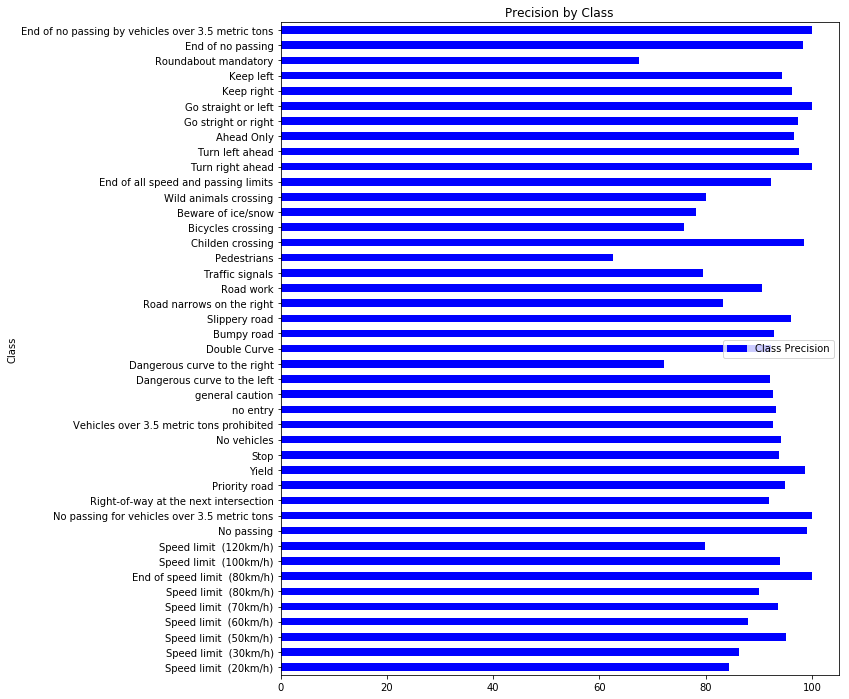

In [48]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

#### 40000 Iterations

In [49]:
optimize(num_iterations=10000)

Optimization Iteration:  30001, Training Accuracy: 100.0%
Optimization Iteration:  30101, Training Accuracy: 100.0%
Optimization Iteration:  30201, Training Accuracy: 100.0%
Optimization Iteration:  30301, Training Accuracy: 100.0%
Optimization Iteration:  30401, Training Accuracy: 100.0%
Optimization Iteration:  30501, Training Accuracy: 100.0%
Optimization Iteration:  30601, Training Accuracy: 100.0%
Optimization Iteration:  30701, Training Accuracy: 100.0%
Optimization Iteration:  30801, Training Accuracy: 100.0%
Optimization Iteration:  30901, Training Accuracy: 100.0%
Optimization Iteration:  31001, Training Accuracy: 100.0%
Optimization Iteration:  31101, Training Accuracy: 100.0%
Optimization Iteration:  31201, Training Accuracy: 100.0%
Optimization Iteration:  31301, Training Accuracy: 100.0%
Optimization Iteration:  31401, Training Accuracy: 100.0%
Optimization Iteration:  31501, Training Accuracy: 100.0%
Optimization Iteration:  31601, Training Accuracy: 100.0%
Optimization I

Accuracy on Test-Set: 93.5% (11803 / 12630)
Confusion Matrix:


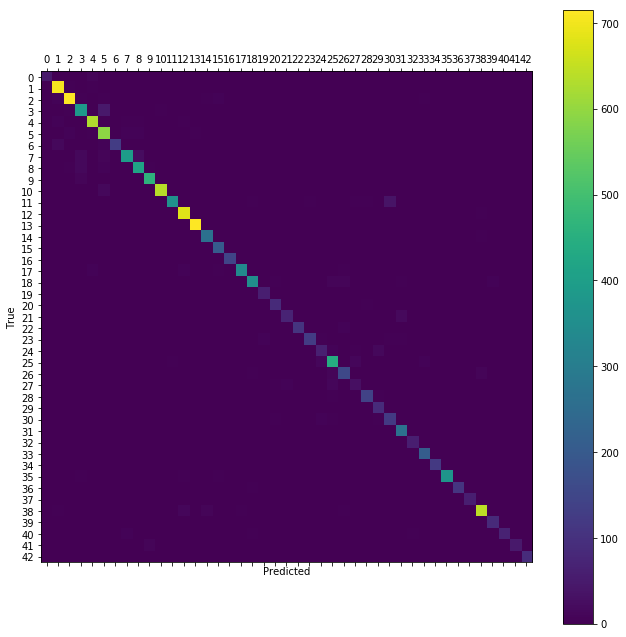

Total Iterations:  40000


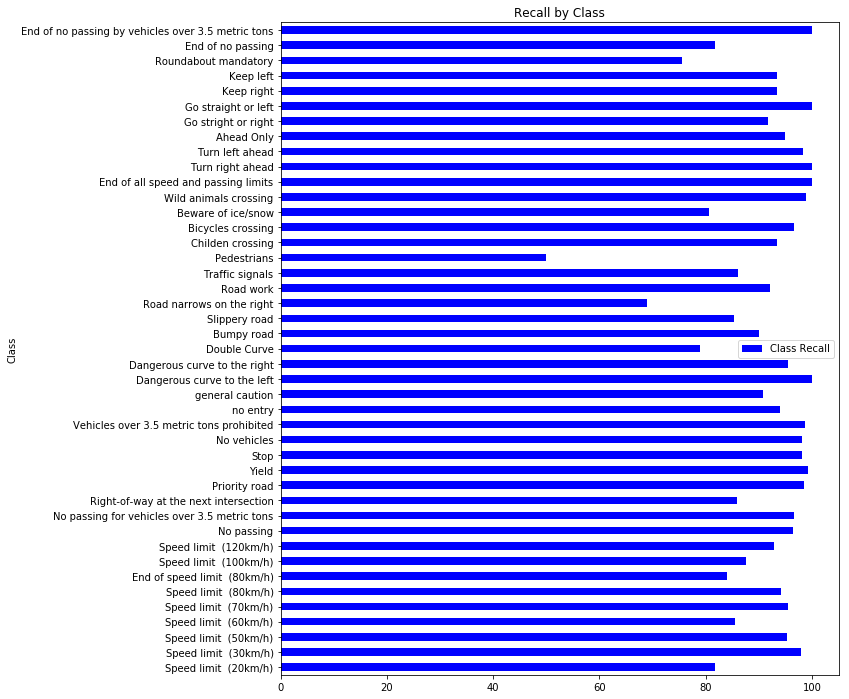

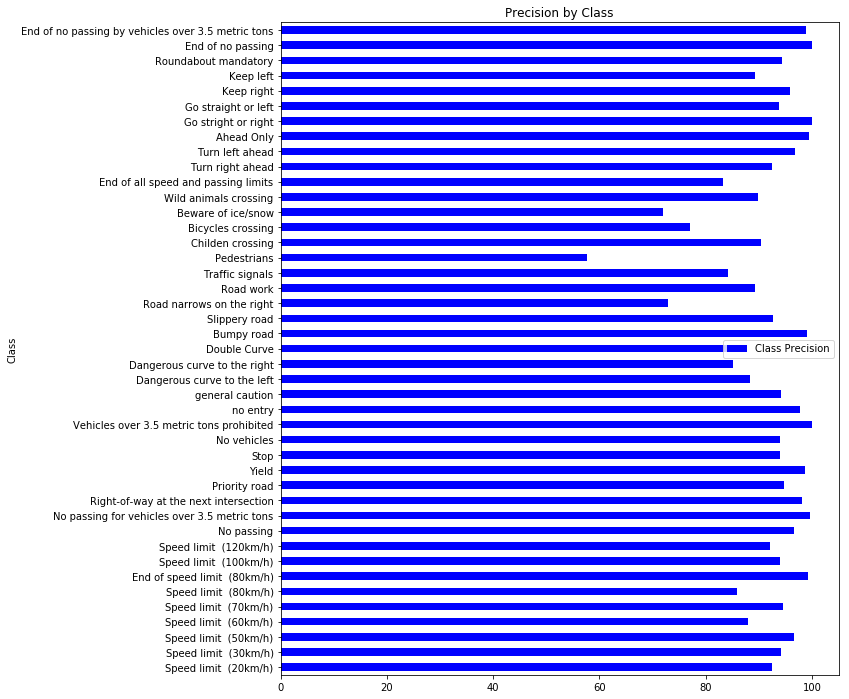

In [50]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

After 40,000 iterations, the test accuracy is 93.5%. The recall is still really low for pedestrian signs.  I dont expect much additional improvement, so I will move on to trying a deeper architecture.

### Architecture 2

The second model architecture I used is based on the VGGNet architecture, which was first introduced in 2014.  The VGGNet is deeper than the LeNet-5 architecture, typically having 16-19 layers. VGGNet uses 3x3 filters, and 13 convolutional layers, with pooling occurring after layers 2, 4, 7, 10, and 13. These layers are followed by 2 fully connected layers and the output layer.

Since I am working with smaller images, I was not able to make the network as deep due to the many pooling layers. Therefore, I modified the VGGNet Architecture to use 3 x 3 filters, and 6 convolutional layers, with pooling on layers 2, 4, and 6.

Even reducing the number of pooling layers to three, the output of the 3rd pooling layer will be only 4 x 4 pixels. I suspect that this will be too many pooling layers, so I will try a second version of this architecture that will skip the 5th and 6th convolutional layers (the 6th being the pooled layer), which will result in output images that are 8 x 8 pixels.


#### Hyperparameters

In [56]:
# Configuration of Neural Network

# Convolutional Layer 1
filter_size1 = 3
num_filters1 = 64

# Convolutional Layer 2
filter_size2 = 3
num_filters2 = 64

# Convolutional Layer 3
filter_size3 = 3
num_filters3 = 128

# Convolutional Layer 4
filter_size4 = 3
num_filters4 = 128

# Convolutional Layer 5
filter_size5 = 3
num_filters5 = 128

# Convolutional Layer 6
filter_size6 = 3
num_filters6 = 128

# Fully Connected Layer 1
fc_size = 2048

# Fully Connected Layer 2
fc2_size = 1024

# Fully Connected Layer 3
fc3_size = 512

# Fully Connected Layer 4 - Output
fc4_size = 43

# Train Batch Size
train_batch_size = 64

# Learning Rate
learning_rate = 0.0001

####  Building Model Architecture 2

In [60]:
# Convolutional Layer 1
conv_layer_1, conv_weights_1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=False)


# Convolutional Layer 2
conv_layer_2, conv_weights_2 = \
    new_conv_layer(input=conv_layer_1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)


# Convolutional Layer 3 
conv_layer_3, conv_weights_3 = \
    new_conv_layer(input=conv_layer_2,
                   num_input_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=False)


#Convolutional Layer 4
conv_layer_4, conv_weights_4 = \
    new_conv_layer(input=conv_layer_3,
                   num_input_channels=num_filters3,
                   filter_size=filter_size4,
                   num_filters=num_filters4,
                   use_pooling=True)


# Convolutional Layer 5
conv_layer_5, conv_weights_5 = \
    new_conv_layer(input=conv_layer_4,
                   num_input_channels=num_filters4,
                   filter_size=filter_size5,
                   num_filters=num_filters5,
                   use_pooling=False)


# Convolutional Layer 6
conv_layer_6, conv_weights_6 = \
    new_conv_layer(input=conv_layer_5,
                   num_input_channels=num_filters5,
                   filter_size=filter_size6,
                   num_filters=num_filters6,
                   use_pooling=True)


# Flattening Layer
layer_flat, num_features = new_flatten_layer(conv_layer_6)


# Fully Connected Layer 1
fully_conn_layer_1 = new_fully_conn_layer(input=layer_flat,
                                          num_inputs=num_features,
                                          num_outputs=fc_size,
                                          use_relu=True)


# Fully Connected Layer 2
fully_conn_layer_2 = new_fully_conn_layer(input=fully_conn_layer_1,
                                          num_inputs=fc_size,
                                          num_outputs=fc2_size,
                                          use_relu=True)

# Fully Connected Layer 3
fully_conn_layer_3 = new_fully_conn_layer(input=fully_conn_layer_2,
                                          num_inputs=fc2_size,
                                          num_outputs=fc3_size,
                                          use_relu=True)

# Fully Connected Layer 4- Output Layer
fully_conn_layer_4 = new_fully_conn_layer(input= fully_conn_layer_3,
                                          num_inputs=fc3_size,
                                          num_outputs=fc4_size,
                                          use_relu=False)


# Predicted Class
y_pred = tf.nn.softmax(fully_conn_layer_4)
y_pred_class = tf.argmax(y_pred, axis=1)


# Cost Function to be Optimized
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=fully_conn_layer_3,
                                                       labels=y_true)
cost = tf.reduce_mean(cross_entropy)


# Optimization Method - Adam Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

# Performance Measures
correct_prediction = tf.equal(y_pred_class, y_true_class)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


print("Conv Layer 1:       ",conv_layer_1)
print("Conv Layer 2:       ",conv_layer_2)
print("Conv Layer 2:       ",conv_layer_3)
print("Conv Layer 4:       ",conv_layer_4)
print("Conv Layer 5:       ",conv_layer_5)
print("Conv Layer 6:       ",conv_layer_6)
print("Flatten Layer:      ",layer_flat)
print("Fully Conn Layer 1: ",fully_conn_layer_1)
print("Fully Conn Layer 2: ",fully_conn_layer_2)
print("Fully Conn Layer 3: ",fully_conn_layer_3)
print("Predicted Class:    ",y_pred_class)
print("Cost Function:      ",cost)

Conv Layer 1:        Tensor("Relu_32:0", shape=(?, 32, 32, 64), dtype=float32)
Conv Layer 2:        Tensor("Relu_33:0", shape=(?, 16, 16, 64), dtype=float32)
Conv Layer 2:        Tensor("Relu_34:0", shape=(?, 16, 16, 128), dtype=float32)
Conv Layer 4:        Tensor("Relu_35:0", shape=(?, 8, 8, 128), dtype=float32)
Conv Layer 5:        Tensor("Relu_36:0", shape=(?, 8, 8, 128), dtype=float32)
Conv Layer 6:        Tensor("Relu_37:0", shape=(?, 4, 4, 128), dtype=float32)
Flatten Layer:       Tensor("Reshape_5:0", shape=(?, 2048), dtype=float32)
Fully Conn Layer 1:  Tensor("Relu_38:0", shape=(?, 2048), dtype=float32)
Fully Conn Layer 2:  Tensor("Relu_39:0", shape=(?, 1024), dtype=float32)
Fully Conn Layer 3:  Tensor("Relu_40:0", shape=(?, 512), dtype=float32)
Predicted Class:     Tensor("ArgMax_4:0", shape=(?,), dtype=int64)
Cost Function:       Tensor("Mean_6:0", shape=(), dtype=float32)


### Begin Training Iterations - 2nd Architecture

In [61]:
session = tf.Session()
session.run(tf.global_variables_initializer())

total_iterations = 0

#### 100 Iterations

In [62]:
optimize(num_iterations=100)

Optimization Iteration:      1, Training Accuracy:   4.7%
Time usage: 0:02:44


Accuracy on Test-Set: 25.6% (3231 / 12630)
Confusion Matrix:


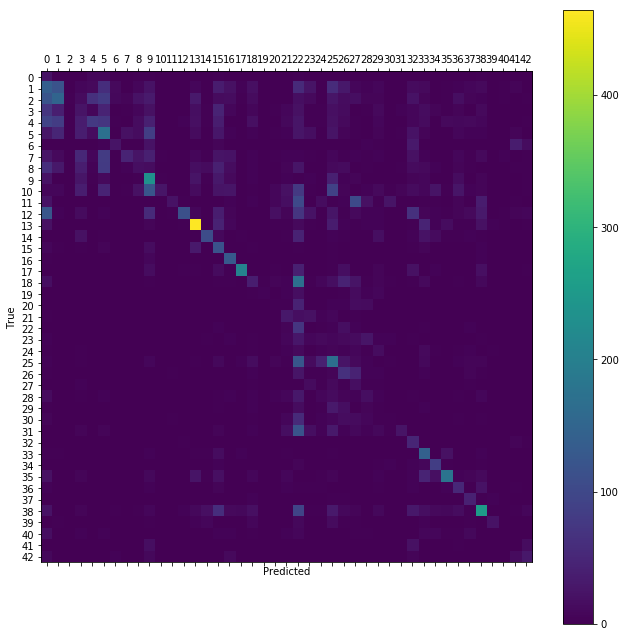

Total Iterations:  100


In [63]:
print_test_accuracy(show_confusion_matrix=True)
print("Total Iterations: ", total_iterations)

So far it seems to be learning! I'll take a look after some more iterations.

#### 1000 Iterations

In [64]:
optimize(num_iterations=900)

Optimization Iteration:    101, Training Accuracy:  48.4%
Optimization Iteration:    201, Training Accuracy:  78.1%
Optimization Iteration:    301, Training Accuracy:  71.9%
Optimization Iteration:    401, Training Accuracy:  84.4%
Optimization Iteration:    501, Training Accuracy:  87.5%
Optimization Iteration:    601, Training Accuracy:  90.6%
Optimization Iteration:    701, Training Accuracy:  92.2%
Optimization Iteration:    801, Training Accuracy:  96.9%
Optimization Iteration:    901, Training Accuracy:  93.8%
Time usage: 0:24:47


Accuracy on Test-Set: 76.0% (9593 / 12630)
Confusion Matrix:


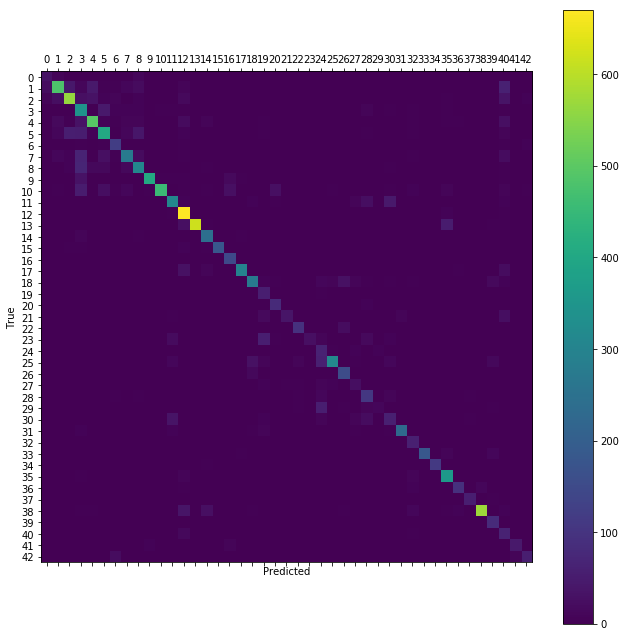

Total Iterations:  1000


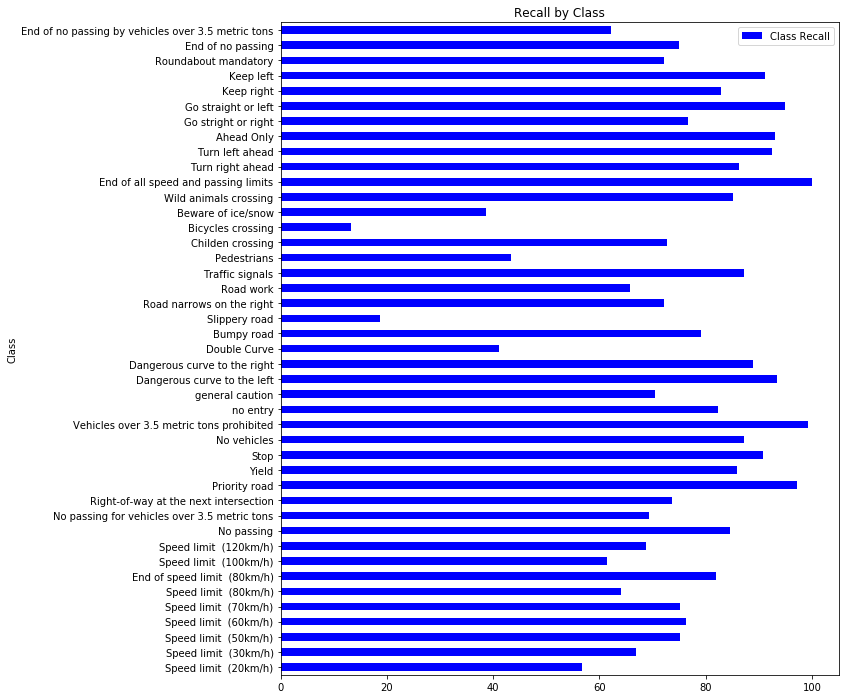

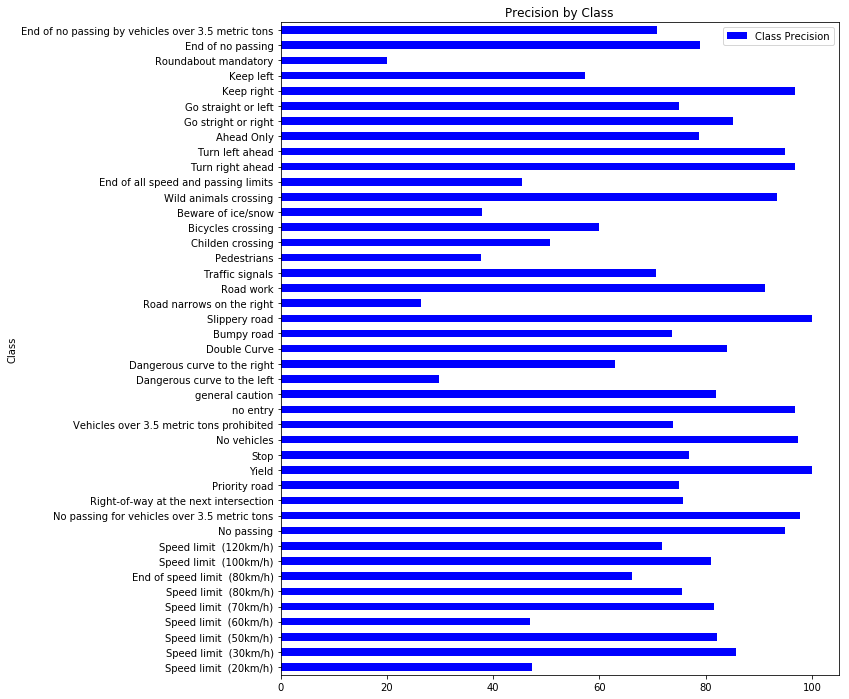

In [65]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

#### 5000 Iterations

In [66]:
optimize(num_iterations=4000)

Optimization Iteration:   1001, Training Accuracy:  93.8%
Optimization Iteration:   1101, Training Accuracy:  96.9%
Optimization Iteration:   1201, Training Accuracy:  93.8%
Optimization Iteration:   1301, Training Accuracy:  95.3%
Optimization Iteration:   1401, Training Accuracy:  92.2%
Optimization Iteration:   1501, Training Accuracy:  98.4%
Optimization Iteration:   1601, Training Accuracy: 100.0%
Optimization Iteration:   1701, Training Accuracy:  98.4%
Optimization Iteration:   1801, Training Accuracy:  96.9%
Optimization Iteration:   1901, Training Accuracy:  98.4%
Optimization Iteration:   2001, Training Accuracy:  98.4%
Optimization Iteration:   2101, Training Accuracy: 100.0%
Optimization Iteration:   2201, Training Accuracy:  98.4%
Optimization Iteration:   2301, Training Accuracy: 100.0%
Optimization Iteration:   2401, Training Accuracy: 100.0%
Optimization Iteration:   2501, Training Accuracy: 100.0%
Optimization Iteration:   2601, Training Accuracy:  96.9%
Optimization I

Accuracy on Test-Set: 89.9% (11359 / 12630)
Confusion Matrix:


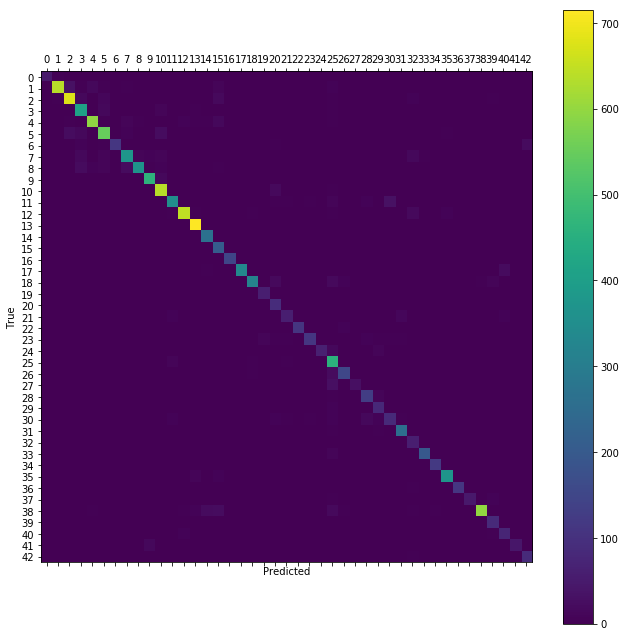

Total Iterations:  5000


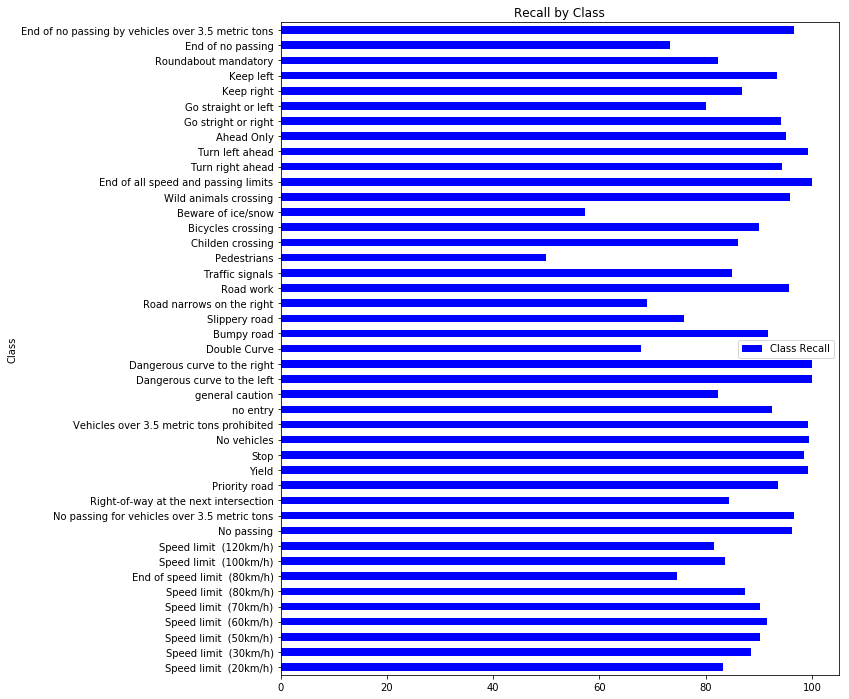

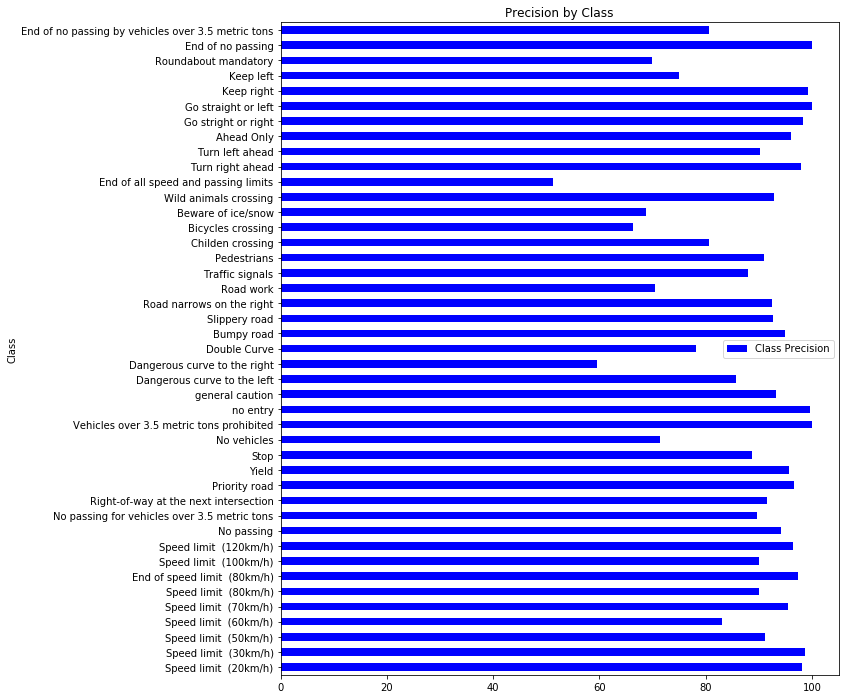

In [67]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

After 5,000 iterations, the test accuracy is nearly 90%.  The recall is low for pedestrians as with the previous architechture. 

#### 10000 Iterations

In [68]:
optimize(num_iterations=5000)

Optimization Iteration:   5001, Training Accuracy: 100.0%
Optimization Iteration:   5101, Training Accuracy: 100.0%
Optimization Iteration:   5201, Training Accuracy: 100.0%
Optimization Iteration:   5301, Training Accuracy: 100.0%
Optimization Iteration:   5401, Training Accuracy:  98.4%
Optimization Iteration:   5501, Training Accuracy:  98.4%
Optimization Iteration:   5601, Training Accuracy: 100.0%
Optimization Iteration:   5701, Training Accuracy: 100.0%
Optimization Iteration:   5801, Training Accuracy: 100.0%
Optimization Iteration:   5901, Training Accuracy: 100.0%
Optimization Iteration:   6001, Training Accuracy: 100.0%
Optimization Iteration:   6101, Training Accuracy: 100.0%
Optimization Iteration:   6201, Training Accuracy: 100.0%
Optimization Iteration:   6301, Training Accuracy: 100.0%
Optimization Iteration:   6401, Training Accuracy:  98.4%
Optimization Iteration:   6501, Training Accuracy: 100.0%
Optimization Iteration:   6601, Training Accuracy: 100.0%
Optimization I

Accuracy on Test-Set: 93.3% (11778 / 12630)
Confusion Matrix:


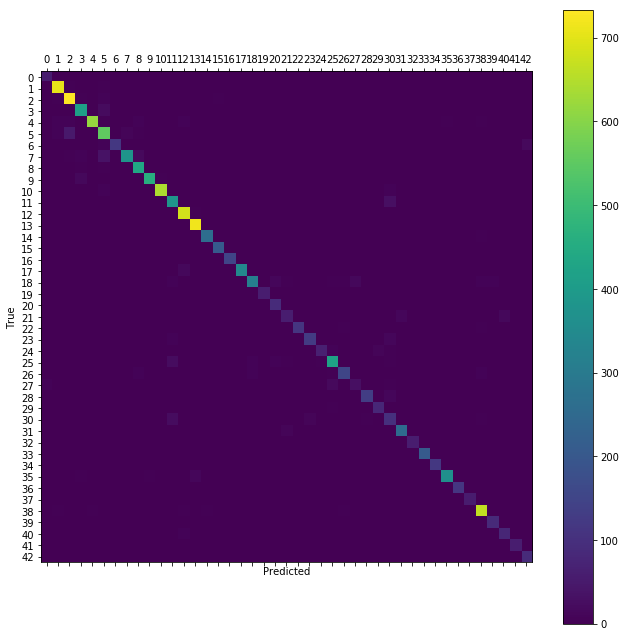

Total Iterations:  10000


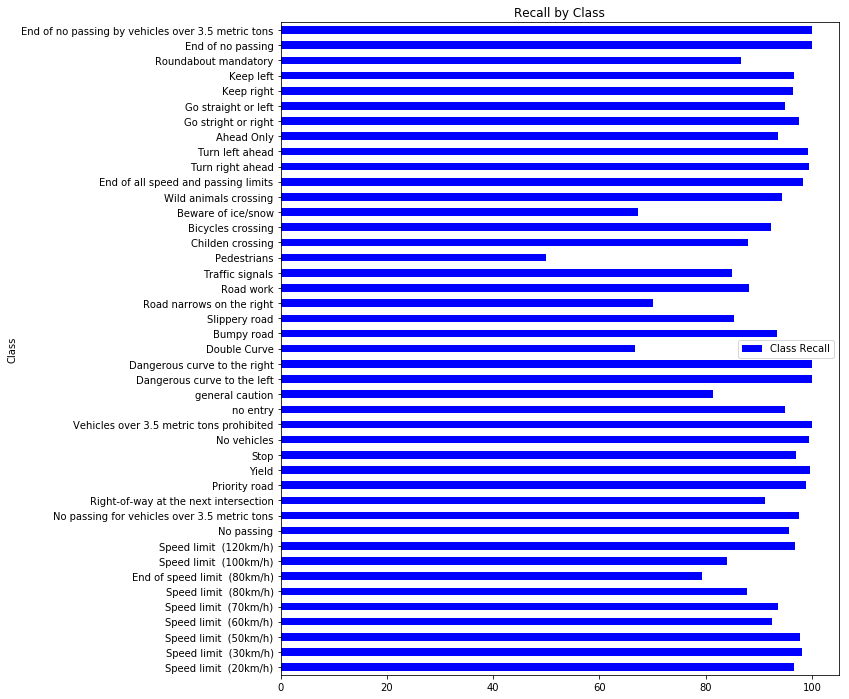

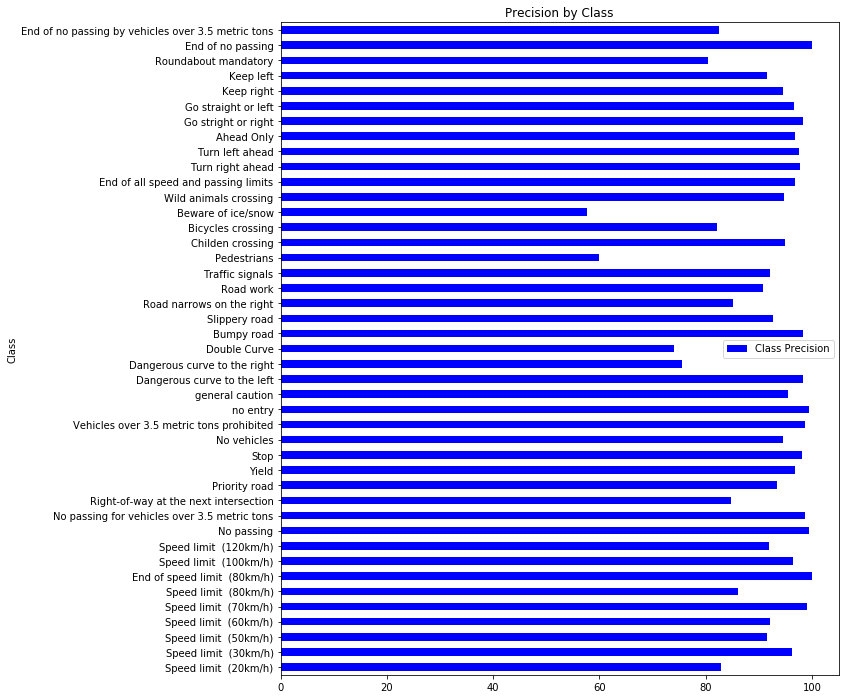

In [69]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

After 10,000 iteratons, the accuracy is at 93.3%, which is nearly as high as with the first architecture after 40,000 iterations. It is still having trouble with pedestrians.

#### 20000 Iterations

In [70]:
optimize(num_iterations=10000)

Optimization Iteration:  10001, Training Accuracy: 100.0%
Optimization Iteration:  10101, Training Accuracy: 100.0%
Optimization Iteration:  10201, Training Accuracy: 100.0%
Optimization Iteration:  10301, Training Accuracy: 100.0%
Optimization Iteration:  10401, Training Accuracy: 100.0%
Optimization Iteration:  10501, Training Accuracy: 100.0%
Optimization Iteration:  10601, Training Accuracy: 100.0%
Optimization Iteration:  10701, Training Accuracy: 100.0%
Optimization Iteration:  10801, Training Accuracy: 100.0%
Optimization Iteration:  10901, Training Accuracy: 100.0%
Optimization Iteration:  11001, Training Accuracy: 100.0%
Optimization Iteration:  11101, Training Accuracy: 100.0%
Optimization Iteration:  11201, Training Accuracy: 100.0%
Optimization Iteration:  11301, Training Accuracy: 100.0%
Optimization Iteration:  11401, Training Accuracy: 100.0%
Optimization Iteration:  11501, Training Accuracy: 100.0%
Optimization Iteration:  11601, Training Accuracy: 100.0%
Optimization I

Accuracy on Test-Set: 95.9% (12117 / 12630)
Confusion Matrix:


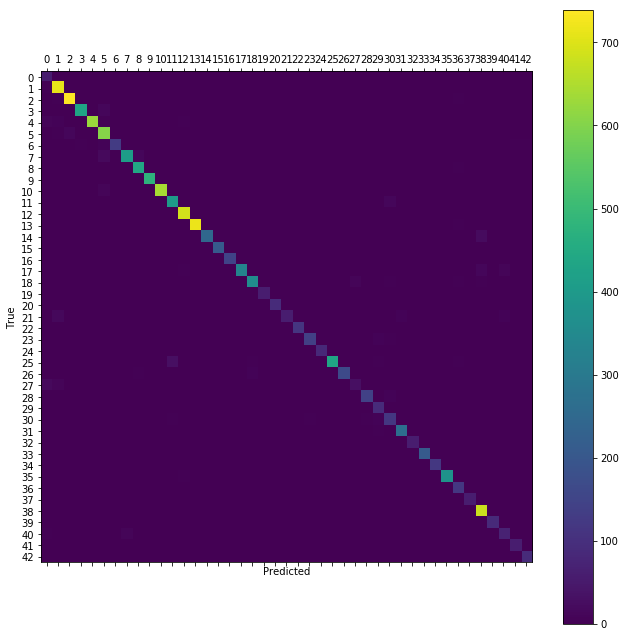

Total Iterations:  20000


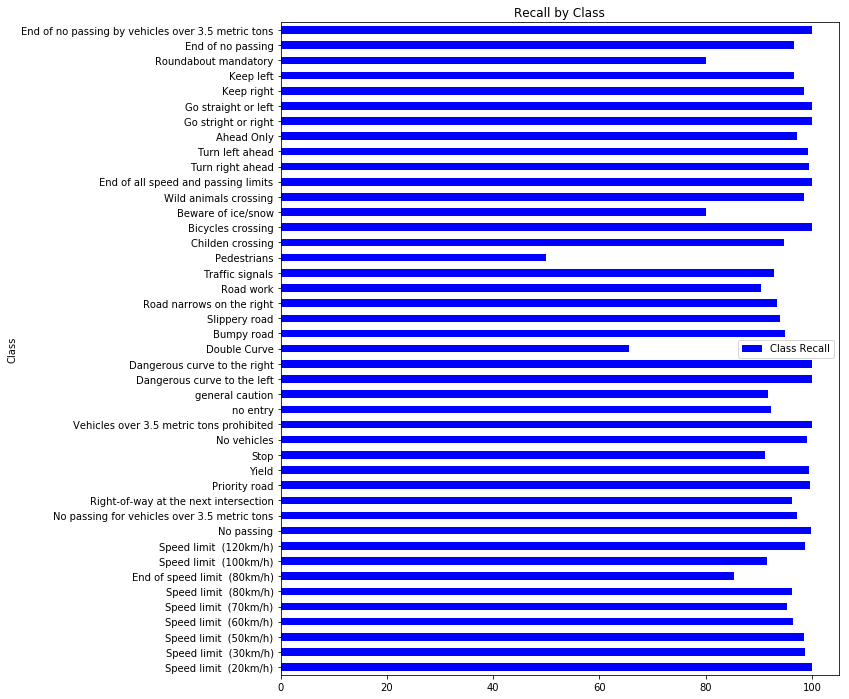

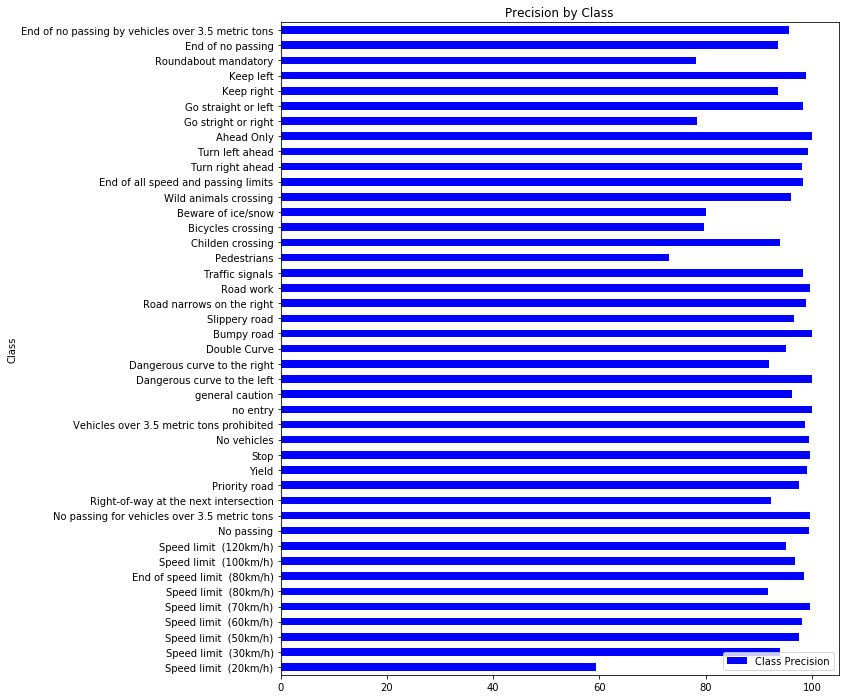

In [71]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

After 20,000 iterations, the accuracy is up to 95.9%, which is the highest seen so far.

#### 30000 Iterations

In [72]:
optimize(num_iterations=10000)

Optimization Iteration:  20001, Training Accuracy: 100.0%
Optimization Iteration:  20101, Training Accuracy: 100.0%
Optimization Iteration:  20201, Training Accuracy: 100.0%
Optimization Iteration:  20301, Training Accuracy: 100.0%
Optimization Iteration:  20401, Training Accuracy: 100.0%
Optimization Iteration:  20501, Training Accuracy: 100.0%
Optimization Iteration:  20601, Training Accuracy: 100.0%
Optimization Iteration:  20701, Training Accuracy: 100.0%
Optimization Iteration:  20801, Training Accuracy: 100.0%
Optimization Iteration:  20901, Training Accuracy: 100.0%
Optimization Iteration:  21001, Training Accuracy: 100.0%
Optimization Iteration:  21101, Training Accuracy: 100.0%
Optimization Iteration:  21201, Training Accuracy: 100.0%
Optimization Iteration:  21301, Training Accuracy: 100.0%
Optimization Iteration:  21401, Training Accuracy: 100.0%
Optimization Iteration:  21501, Training Accuracy: 100.0%
Optimization Iteration:  21601, Training Accuracy: 100.0%
Optimization I

Accuracy on Test-Set: 95.0% (12000 / 12630)
Confusion Matrix:


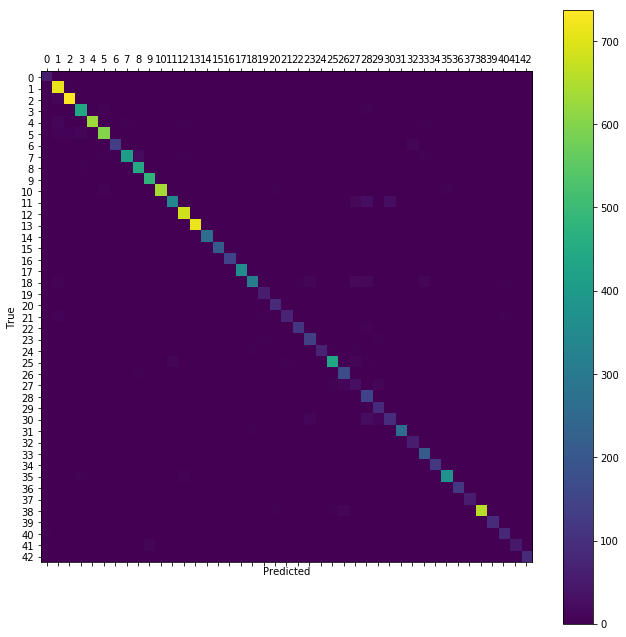

Total Iterations:  30000


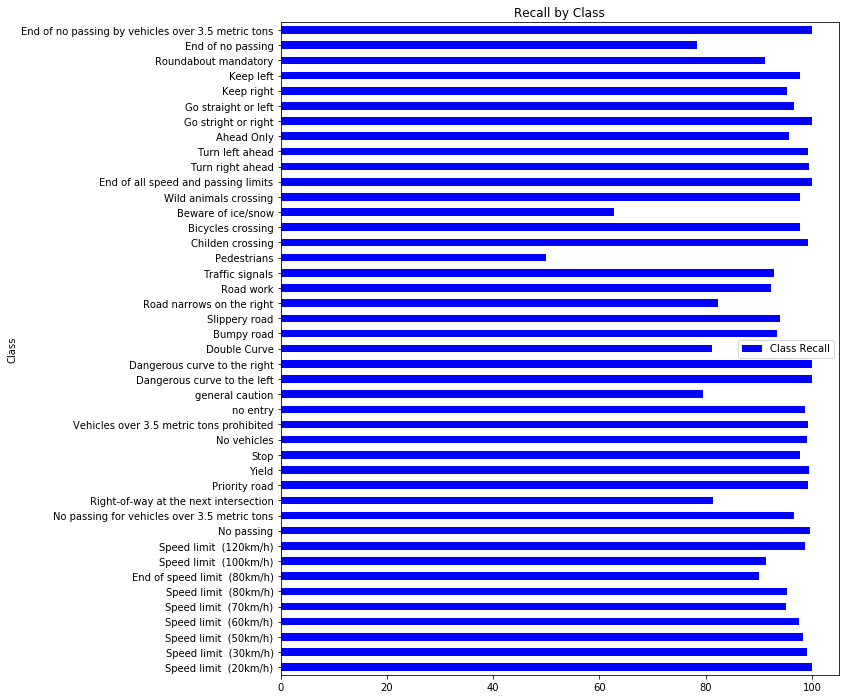

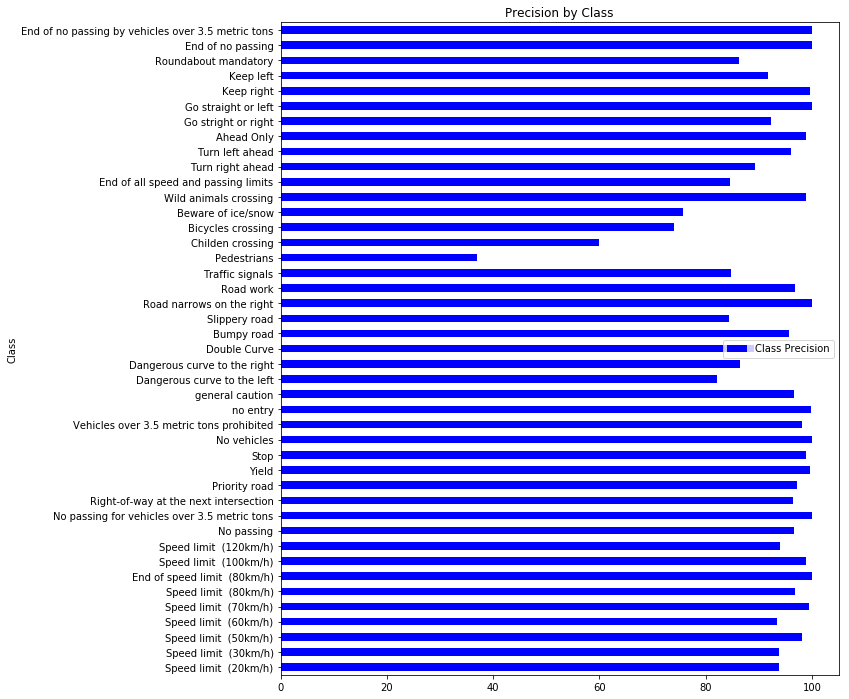

In [73]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

The accuracy dropped a little, so I'll run 10,000 more iterations and stop there.

#### 40000 Iterations

In [74]:
optimize(num_iterations=10000)

Optimization Iteration:  30001, Training Accuracy: 100.0%
Optimization Iteration:  30101, Training Accuracy: 100.0%
Optimization Iteration:  30201, Training Accuracy: 100.0%
Optimization Iteration:  30301, Training Accuracy: 100.0%
Optimization Iteration:  30401, Training Accuracy: 100.0%
Optimization Iteration:  30501, Training Accuracy: 100.0%
Optimization Iteration:  30601, Training Accuracy: 100.0%
Optimization Iteration:  30701, Training Accuracy: 100.0%
Optimization Iteration:  30801, Training Accuracy: 100.0%
Optimization Iteration:  30901, Training Accuracy: 100.0%
Optimization Iteration:  31001, Training Accuracy: 100.0%
Optimization Iteration:  31101, Training Accuracy: 100.0%
Optimization Iteration:  31201, Training Accuracy: 100.0%
Optimization Iteration:  31301, Training Accuracy: 100.0%
Optimization Iteration:  31401, Training Accuracy: 100.0%
Optimization Iteration:  31501, Training Accuracy: 100.0%
Optimization Iteration:  31601, Training Accuracy: 100.0%
Optimization I

Accuracy on Test-Set: 96.4% (12180 / 12630)
Confusion Matrix:


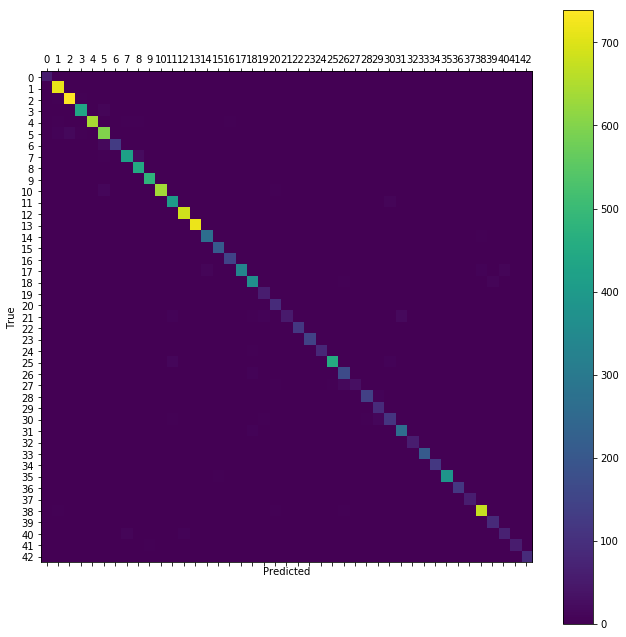

Total Iterations:  40000


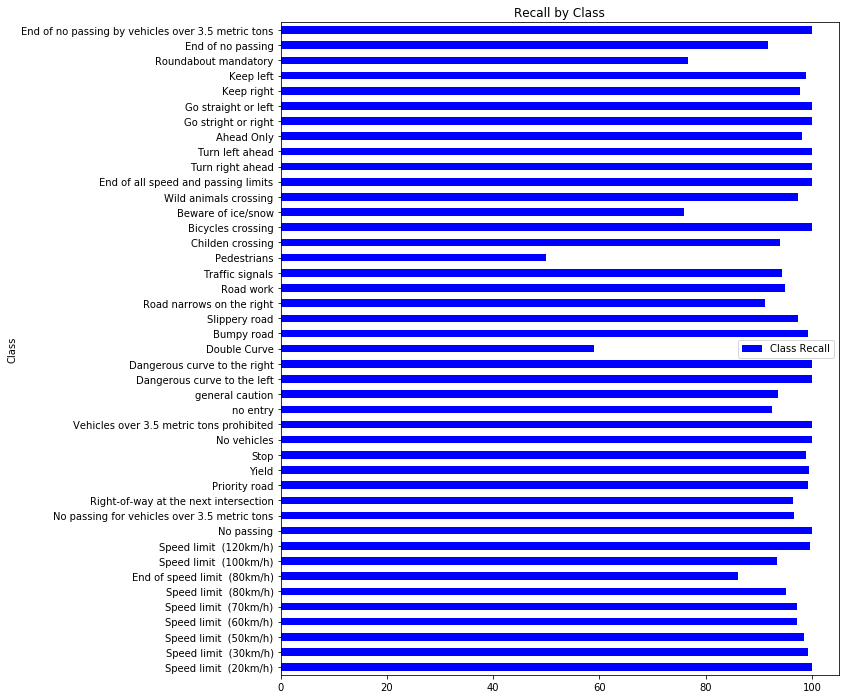

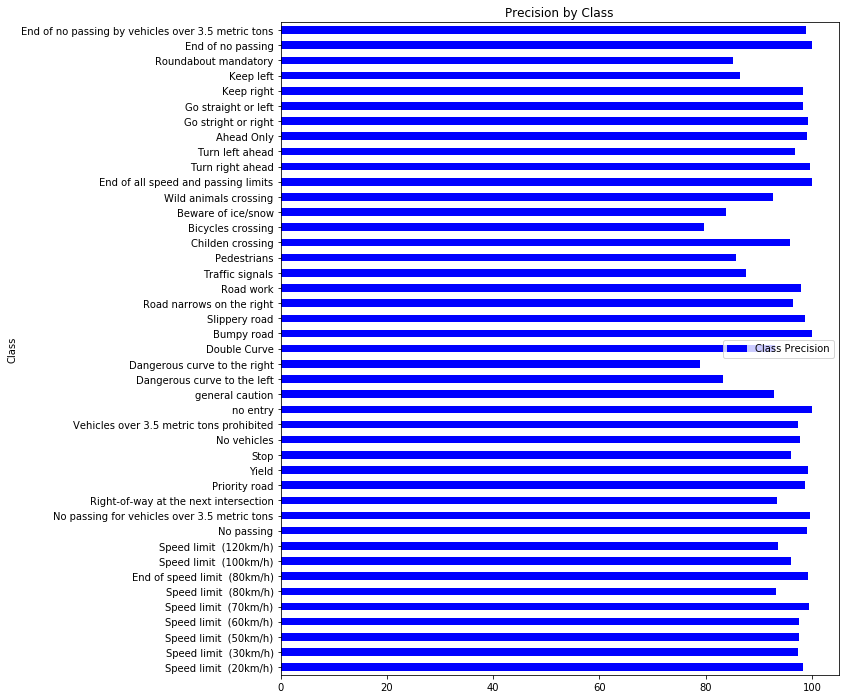

In [75]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

After 40,000 iterations, the accuracy is at 96.4%.  It is still struggling with pedestrian and double curve signs. 

I'll try one more architecture, another version of the VGGNet.

### Architecture 2 - Alternate

The final architecture I will try is another variation of the VGGNet architecture. This version will drop the final two convolutional layers resulting in one less pooling layer. While it will not be as deep of a network, without the third pooling layer the output images will be 8 x 8 instead of 4 x 4, and I'm hoping this will result in some improvement.


#### Hyperparameters

In [105]:
# Configuration of Neural Network

# Convolutional Layer 1
filter_size1 = 3
num_filters1 = 64

# Convolutional Layer 2
filter_size2 = 3
num_filters2 = 64

# Convolutional Layer 3
filter_size3 = 3
num_filters3 = 128

# Convolutional Layer 4
filter_size4 = 3
num_filters4 = 128

# Fully Connected Layer 1
fc_size = 1024

# Fully Connected Layer 2
fc2_size = 512

# Fully Connected Layer 3 - Output Layer
fc3_size = 43


# Train Batch Size
train_batch_size = 64

# Learning Rate
learning_rate = 0.0001

####  Building Model Architecture 2 - Alternate

In [118]:
# Convolutional Layer 1
conv_layer_1, conv_weights_1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=False)


# Convolutional Layer 2
conv_layer_2, conv_weights_2 = \
    new_conv_layer(input=conv_layer_1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)


# Convolutional Layer 3 
conv_layer_3, conv_weights_3 = \
    new_conv_layer(input=conv_layer_2,
                   num_input_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=False)


#Convolutional Layer 4
conv_layer_4, conv_weights_4 = \
    new_conv_layer(input=conv_layer_3,
                   num_input_channels=num_filters3,
                   filter_size=filter_size4,
                   num_filters=num_filters4,
                   use_pooling=True)


# Flattening Layer
layer_flat, num_features = new_flatten_layer(conv_layer_4)


# Fully Connected Layer 1
fully_conn_layer_1 = new_fully_conn_layer(input=layer_flat,
                                          num_inputs=num_features,
                                          num_outputs=fc_size,
                                          use_relu=True)


# Fully Connected Layer 2
fully_conn_layer_2 = new_fully_conn_layer(input=fully_conn_layer_1,
                                          num_inputs=fc_size,
                                          num_outputs=fc2_size,
                                          use_relu=True)

# Fully Connected Layer 3 - Output Layer
fully_conn_layer_3 = new_fully_conn_layer(input=fully_conn_layer_2,
                                          num_inputs=fc2_size,
                                          num_outputs=fc3_size,
                                          use_relu=False)


# Predicted Class
y_pred = tf.nn.softmax(fully_conn_layer_3)
y_pred_class = tf.argmax(y_pred, axis=1)


# Cost Function to be Optimized
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=fully_conn_layer_3,
                                                       labels=y_true)
cost = tf.reduce_mean(cross_entropy)


# Optimization Method - Adam Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Performance Measures
correct_prediction = tf.equal(y_pred_class, y_true_class)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


print("Conv Layer 1:       ",conv_layer_1)
print("Conv Layer 2:       ",conv_layer_2)
print("Conv Layer 2:       ",conv_layer_3)
print("Conv Layer 4:       ",conv_layer_4)
print("Flatten Layer:      ",layer_flat)
print("Fully Conn Layer 1: ",fully_conn_layer_1)
print("Fully Conn Layer 2: ",fully_conn_layer_2)
print("Fully Conn Layer 3: ",fully_conn_layer_3)
print("Predicted Class:    ",y_pred_class)
print("Cost Function:      ",cost)

Conv Layer 1:        Tensor("Relu:0", shape=(?, 32, 32, 64), dtype=float32)
Conv Layer 2:        Tensor("Relu_1:0", shape=(?, 16, 16, 64), dtype=float32)
Conv Layer 2:        Tensor("Relu_2:0", shape=(?, 16, 16, 128), dtype=float32)
Conv Layer 4:        Tensor("Relu_3:0", shape=(?, 8, 8, 128), dtype=float32)
Flatten Layer:       Tensor("Reshape_1:0", shape=(?, 8192), dtype=float32)
Fully Conn Layer 1:  Tensor("Relu_4:0", shape=(?, 1024), dtype=float32)
Fully Conn Layer 2:  Tensor("Relu_5:0", shape=(?, 512), dtype=float32)
Fully Conn Layer 3:  Tensor("add_6:0", shape=(?, 43), dtype=float32)
Predicted Class:     Tensor("ArgMax_1:0", shape=(?,), dtype=int64)
Cost Function:       Tensor("Mean:0", shape=(), dtype=float32)


### Begin Training Iterations - 2nd Architecture - Alternate Version

In [119]:
session = tf.Session()
session.run(tf.global_variables_initializer())

total_iterations = 0

#### 100 Iterations

In [120]:
optimize(num_iterations=100)

Optimization Iteration:      1, Training Accuracy:   3.1%
Time usage: 0:02:28


Accuracy on Test-Set: 28.7% (3623 / 12630)
Confusion Matrix:


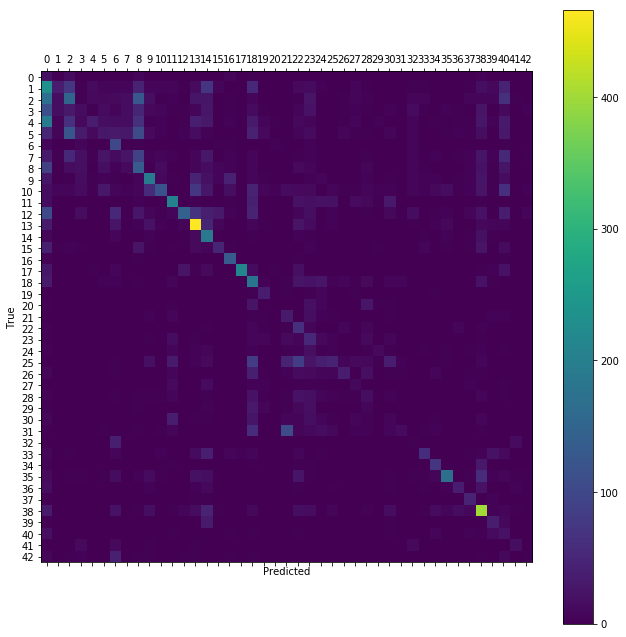

Total Iterations:  100


In [121]:
print_test_accuracy(show_confusion_matrix=True)
print("Total Iterations: ", total_iterations)

#### 1000 Iterations

In [122]:
optimize(num_iterations=900)

Optimization Iteration:    101, Training Accuracy:  39.1%
Optimization Iteration:    201, Training Accuracy:  82.8%
Optimization Iteration:    301, Training Accuracy:  76.6%
Optimization Iteration:    401, Training Accuracy:  76.6%
Optimization Iteration:    501, Training Accuracy:  95.3%
Optimization Iteration:    601, Training Accuracy:  96.9%
Optimization Iteration:    701, Training Accuracy:  89.1%
Optimization Iteration:    801, Training Accuracy:  93.8%
Optimization Iteration:    901, Training Accuracy: 100.0%
Time usage: 0:22:11


Accuracy on Test-Set: 82.7% (10449 / 12630)
Confusion Matrix:


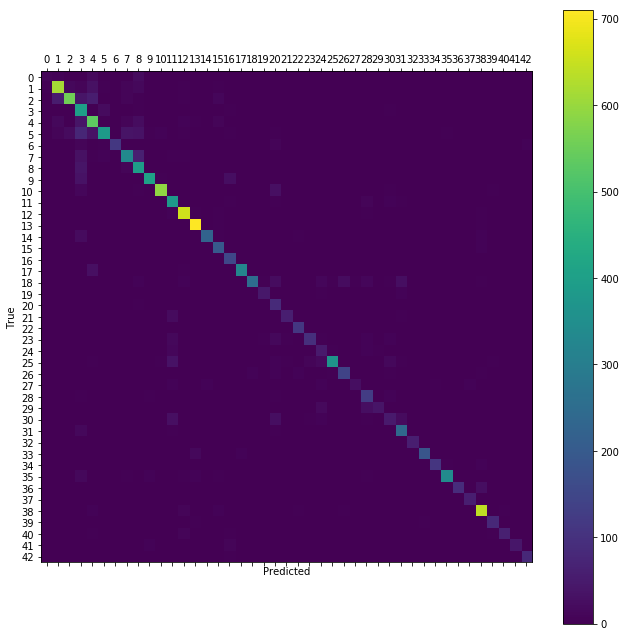

Total Iterations:  1000


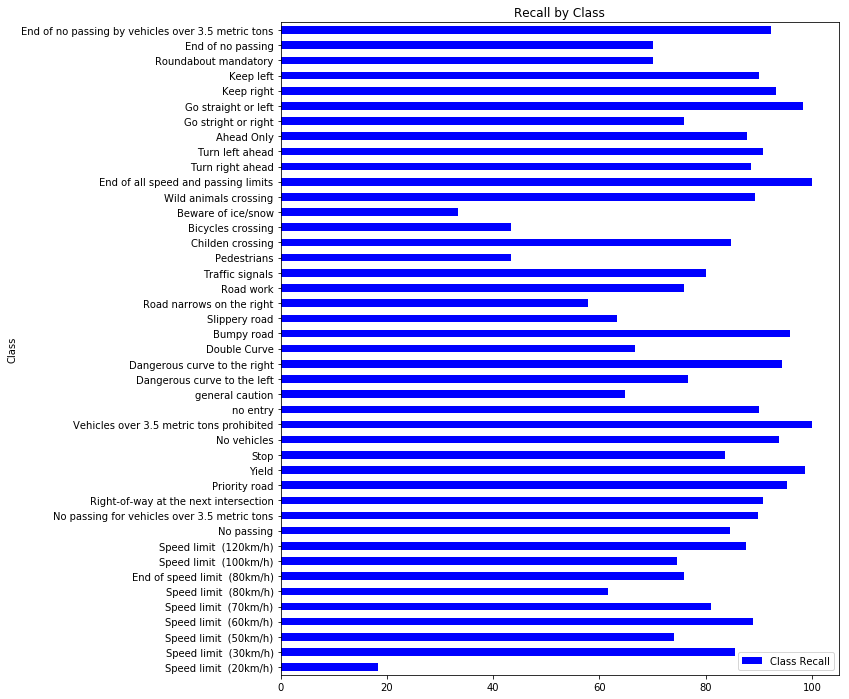

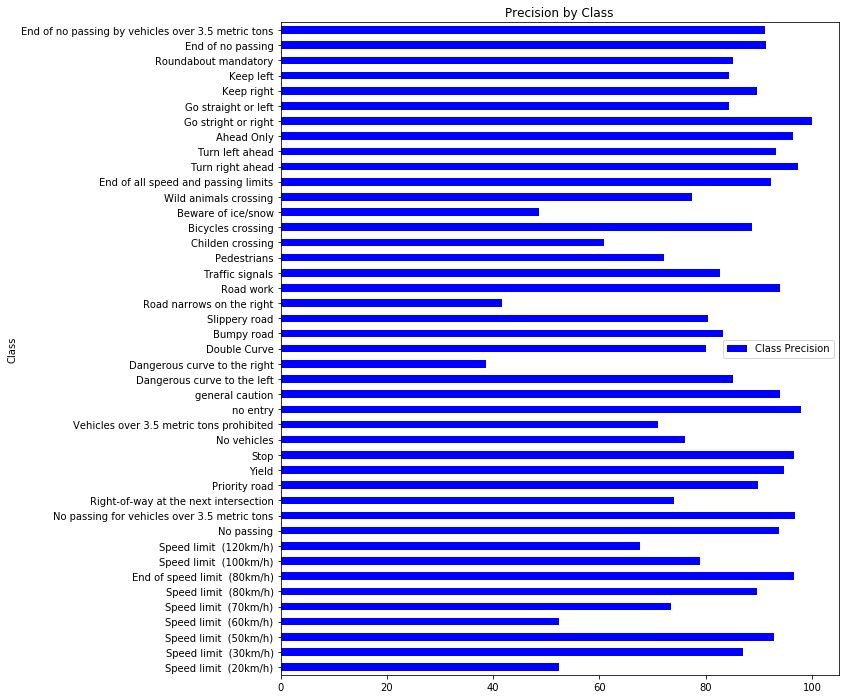

In [123]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

After 1,000 iterations, the accuracy is at 82.7%.

#### 5000 Iterations

In [124]:
optimize(num_iterations=4000)

Optimization Iteration:   1001, Training Accuracy:  98.4%
Optimization Iteration:   1101, Training Accuracy:  95.3%
Optimization Iteration:   1201, Training Accuracy:  96.9%
Optimization Iteration:   1301, Training Accuracy:  96.9%
Optimization Iteration:   1401, Training Accuracy:  96.9%
Optimization Iteration:   1501, Training Accuracy:  98.4%
Optimization Iteration:   1601, Training Accuracy: 100.0%
Optimization Iteration:   1701, Training Accuracy: 100.0%
Optimization Iteration:   1801, Training Accuracy: 100.0%
Optimization Iteration:   1901, Training Accuracy:  98.4%
Optimization Iteration:   2001, Training Accuracy: 100.0%
Optimization Iteration:   2101, Training Accuracy:  98.4%
Optimization Iteration:   2201, Training Accuracy:  98.4%
Optimization Iteration:   2301, Training Accuracy:  96.9%
Optimization Iteration:   2401, Training Accuracy: 100.0%
Optimization Iteration:   2501, Training Accuracy:  98.4%
Optimization Iteration:   2601, Training Accuracy: 100.0%
Optimization I

Accuracy on Test-Set: 92.4% (11665 / 12630)
Confusion Matrix:


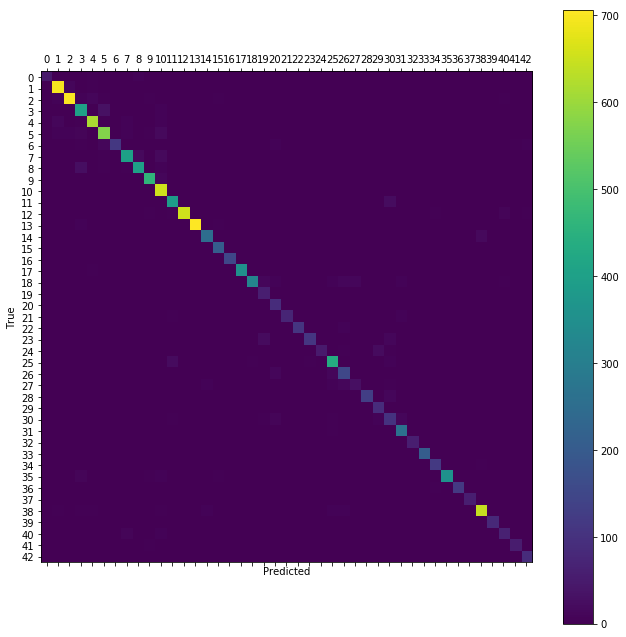

Total Iterations:  5000


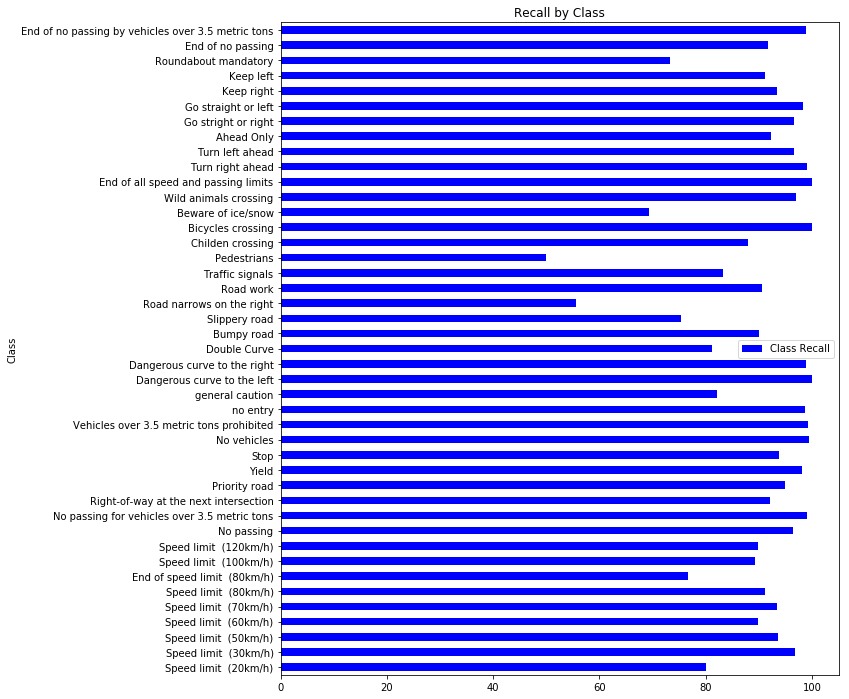

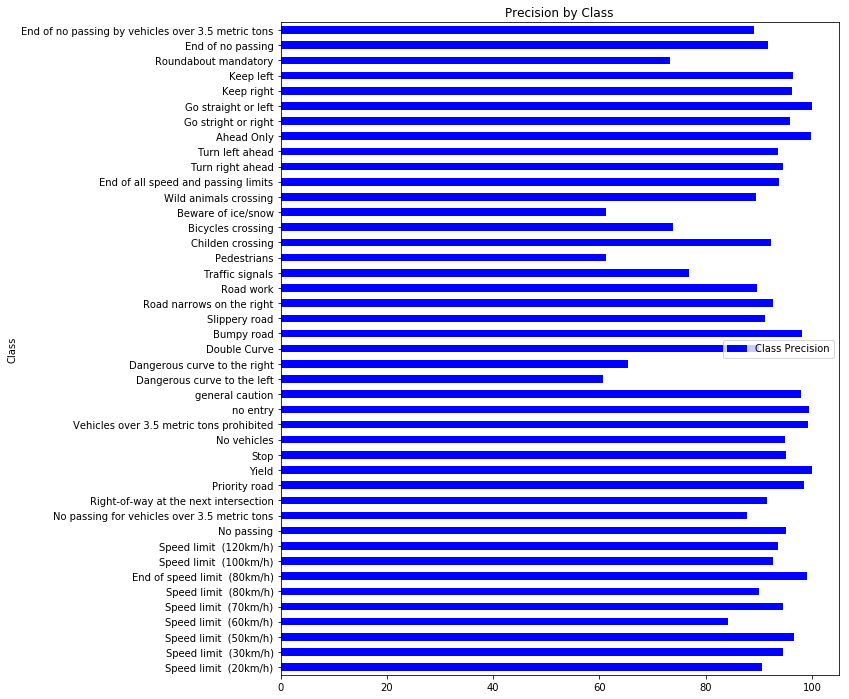

In [125]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

#### 10000 Iterations

In [126]:
optimize(num_iterations=5000)

Optimization Iteration:   5001, Training Accuracy: 100.0%
Optimization Iteration:   5101, Training Accuracy: 100.0%
Optimization Iteration:   5201, Training Accuracy: 100.0%
Optimization Iteration:   5301, Training Accuracy: 100.0%
Optimization Iteration:   5401, Training Accuracy: 100.0%
Optimization Iteration:   5501, Training Accuracy: 100.0%
Optimization Iteration:   5601, Training Accuracy: 100.0%
Optimization Iteration:   5701, Training Accuracy: 100.0%
Optimization Iteration:   5801, Training Accuracy: 100.0%
Optimization Iteration:   5901, Training Accuracy: 100.0%
Optimization Iteration:   6001, Training Accuracy: 100.0%
Optimization Iteration:   6101, Training Accuracy: 100.0%
Optimization Iteration:   6201, Training Accuracy: 100.0%
Optimization Iteration:   6301, Training Accuracy: 100.0%
Optimization Iteration:   6401, Training Accuracy: 100.0%
Optimization Iteration:   6501, Training Accuracy: 100.0%
Optimization Iteration:   6601, Training Accuracy: 100.0%
Optimization I

Accuracy on Test-Set: 95.0% (12002 / 12630)
Confusion Matrix:


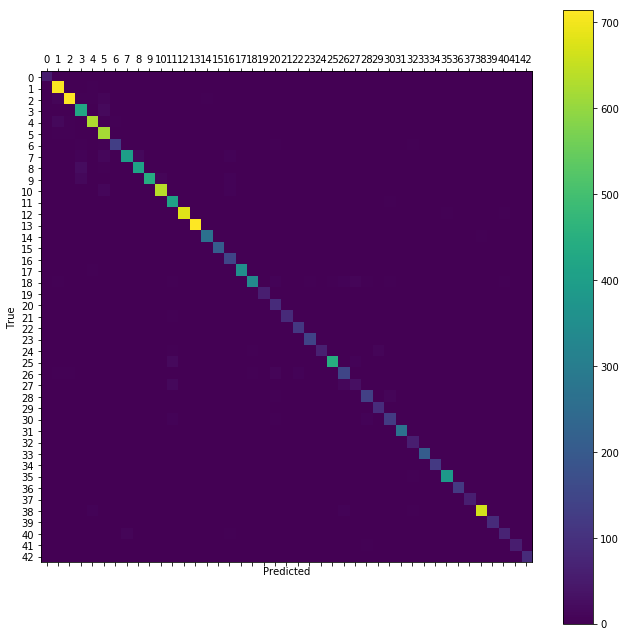

Total Iterations:  10000


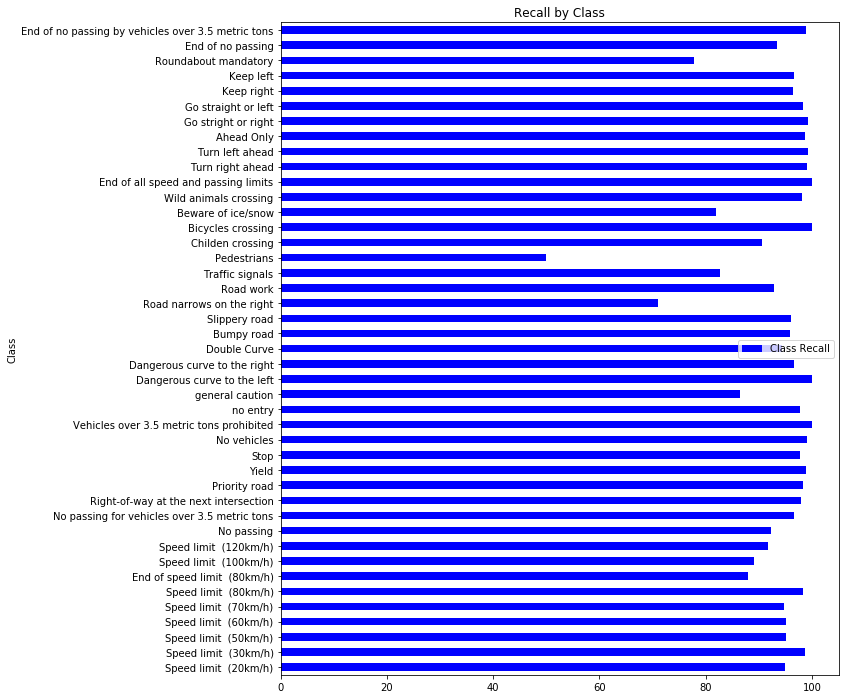

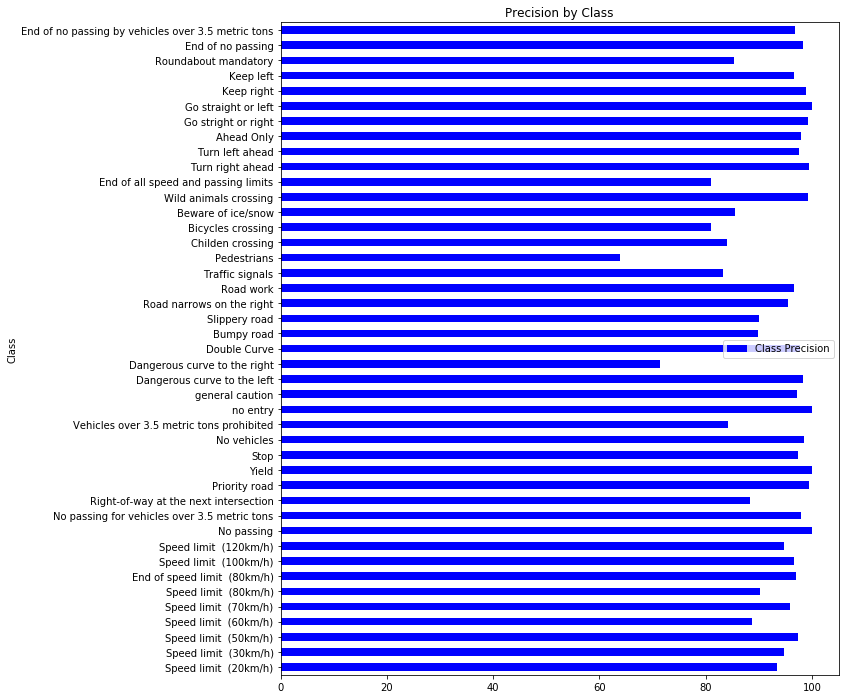

In [127]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

After 10,000 iterations, the test accuracy is at 95%, which is higher than the previous two models at this point.

#### 20000 Iterations

In [128]:
optimize(num_iterations=10000)

Optimization Iteration:  10001, Training Accuracy: 100.0%
Optimization Iteration:  10101, Training Accuracy: 100.0%
Optimization Iteration:  10201, Training Accuracy: 100.0%
Optimization Iteration:  10301, Training Accuracy: 100.0%
Optimization Iteration:  10401, Training Accuracy: 100.0%
Optimization Iteration:  10501, Training Accuracy: 100.0%
Optimization Iteration:  10601, Training Accuracy: 100.0%
Optimization Iteration:  10701, Training Accuracy: 100.0%
Optimization Iteration:  10801, Training Accuracy: 100.0%
Optimization Iteration:  10901, Training Accuracy: 100.0%
Optimization Iteration:  11001, Training Accuracy: 100.0%
Optimization Iteration:  11101, Training Accuracy: 100.0%
Optimization Iteration:  11201, Training Accuracy: 100.0%
Optimization Iteration:  11301, Training Accuracy: 100.0%
Optimization Iteration:  11401, Training Accuracy: 100.0%
Optimization Iteration:  11501, Training Accuracy: 100.0%
Optimization Iteration:  11601, Training Accuracy: 100.0%
Optimization I

Accuracy on Test-Set: 95.7% (12092 / 12630)
Confusion Matrix:


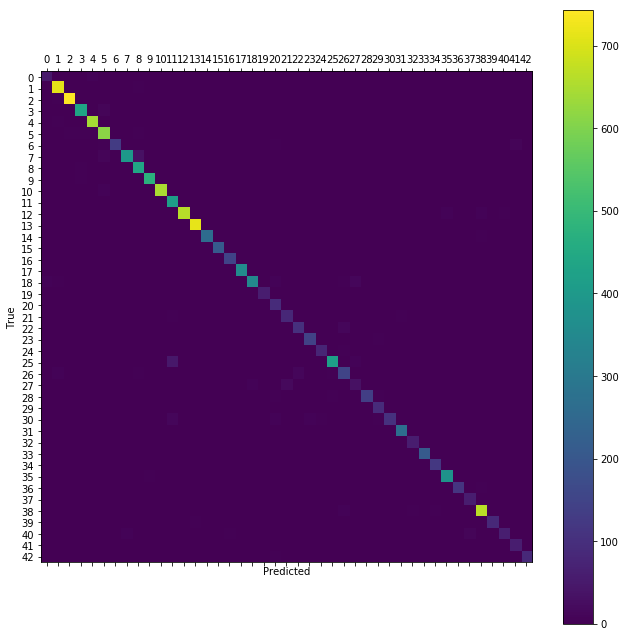

Total Iterations:  20000


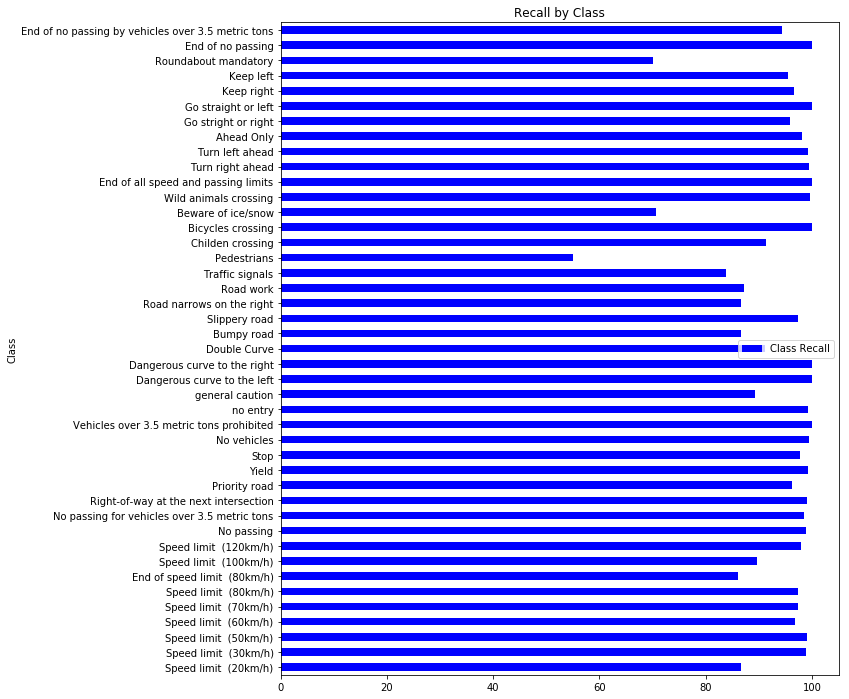

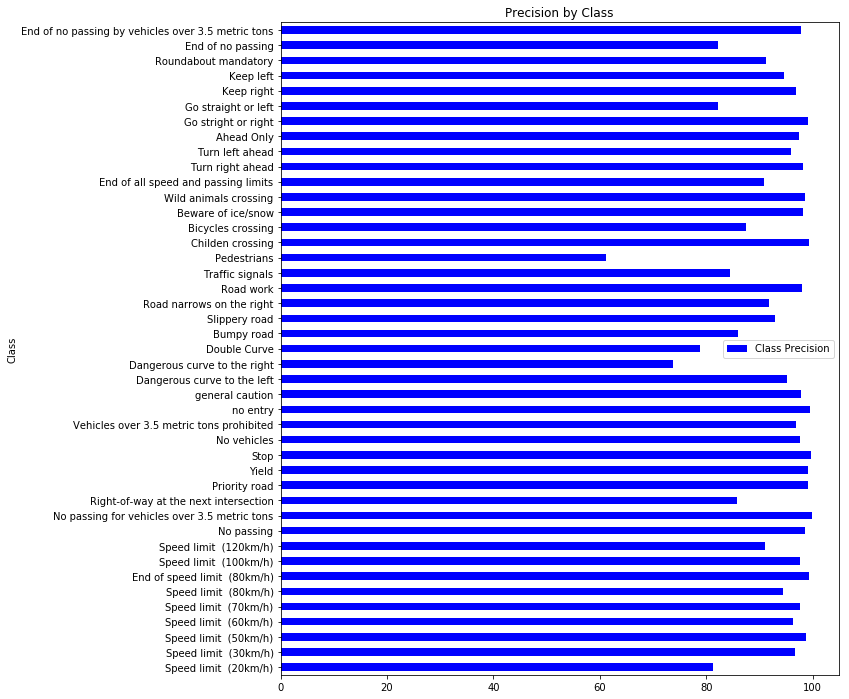

In [129]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

The accuracy is improving much more slowly, but still going up.

#### 30000 Iterations

In [130]:
optimize(num_iterations=10000)

Optimization Iteration:  20001, Training Accuracy: 100.0%
Optimization Iteration:  20101, Training Accuracy: 100.0%
Optimization Iteration:  20201, Training Accuracy: 100.0%
Optimization Iteration:  20301, Training Accuracy: 100.0%
Optimization Iteration:  20401, Training Accuracy: 100.0%
Optimization Iteration:  20501, Training Accuracy: 100.0%
Optimization Iteration:  20601, Training Accuracy: 100.0%
Optimization Iteration:  20701, Training Accuracy: 100.0%
Optimization Iteration:  20801, Training Accuracy: 100.0%
Optimization Iteration:  20901, Training Accuracy: 100.0%
Optimization Iteration:  21001, Training Accuracy: 100.0%
Optimization Iteration:  21101, Training Accuracy: 100.0%
Optimization Iteration:  21201, Training Accuracy: 100.0%
Optimization Iteration:  21301, Training Accuracy: 100.0%
Optimization Iteration:  21401, Training Accuracy: 100.0%
Optimization Iteration:  21501, Training Accuracy: 100.0%
Optimization Iteration:  21601, Training Accuracy: 100.0%
Optimization I

Accuracy on Test-Set: 96.5% (12188 / 12630)
Confusion Matrix:


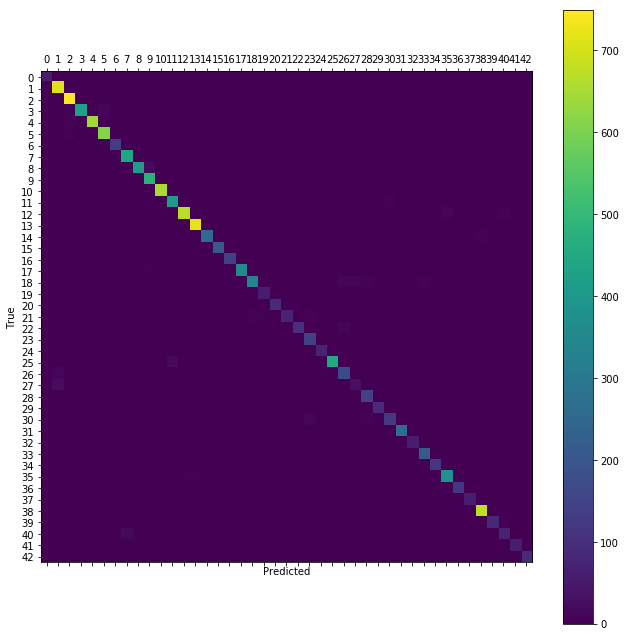

Total Iterations:  30000


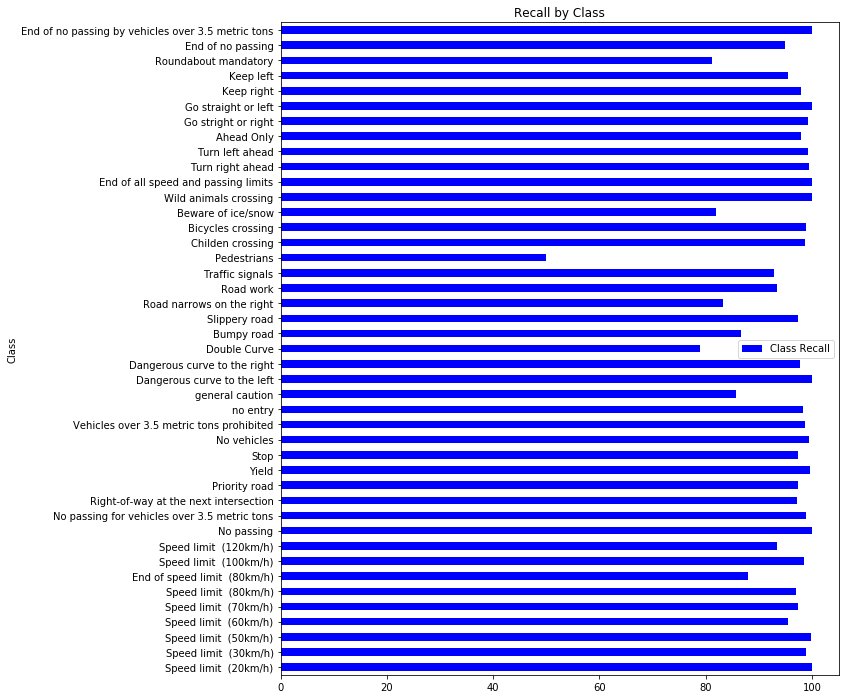

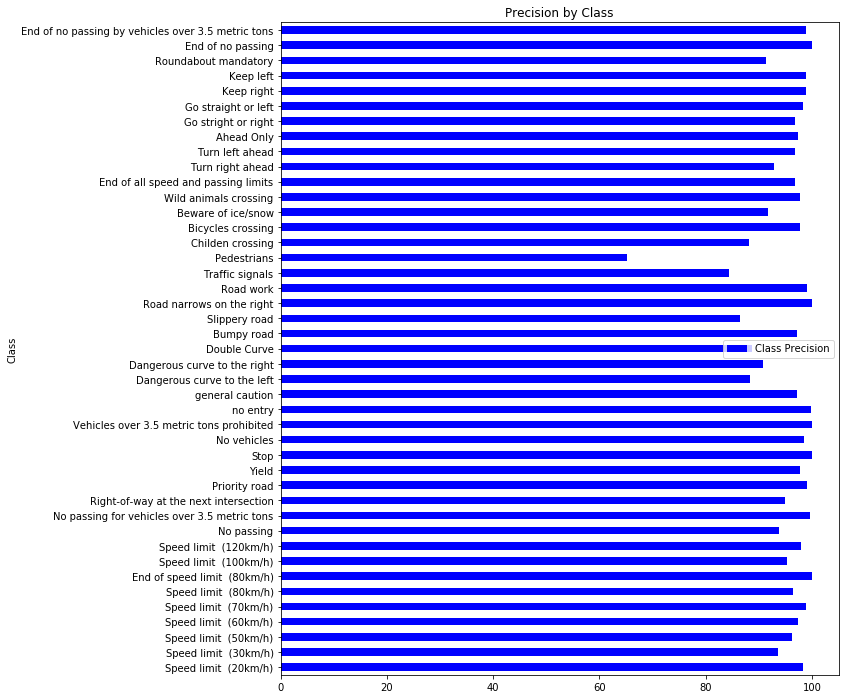

In [131]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

Test acuracy is at 96.5%, which is better than the other models were able to achieve.  I'll run another 10,000 iterations and see if there are any more improvements to be made.

#### 40000 Iterations

In [132]:
optimize(num_iterations=10000)

Optimization Iteration:  30001, Training Accuracy: 100.0%
Optimization Iteration:  30101, Training Accuracy: 100.0%
Optimization Iteration:  30201, Training Accuracy: 100.0%
Optimization Iteration:  30301, Training Accuracy: 100.0%
Optimization Iteration:  30401, Training Accuracy: 100.0%
Optimization Iteration:  30501, Training Accuracy: 100.0%
Optimization Iteration:  30601, Training Accuracy: 100.0%
Optimization Iteration:  30701, Training Accuracy: 100.0%
Optimization Iteration:  30801, Training Accuracy: 100.0%
Optimization Iteration:  30901, Training Accuracy: 100.0%
Optimization Iteration:  31001, Training Accuracy: 100.0%
Optimization Iteration:  31101, Training Accuracy: 100.0%
Optimization Iteration:  31201, Training Accuracy: 100.0%
Optimization Iteration:  31301, Training Accuracy: 100.0%
Optimization Iteration:  31401, Training Accuracy: 100.0%
Optimization Iteration:  31501, Training Accuracy: 100.0%
Optimization Iteration:  31601, Training Accuracy: 100.0%
Optimization I

Accuracy on Test-Set: 97.1% (12263 / 12630)
Confusion Matrix:


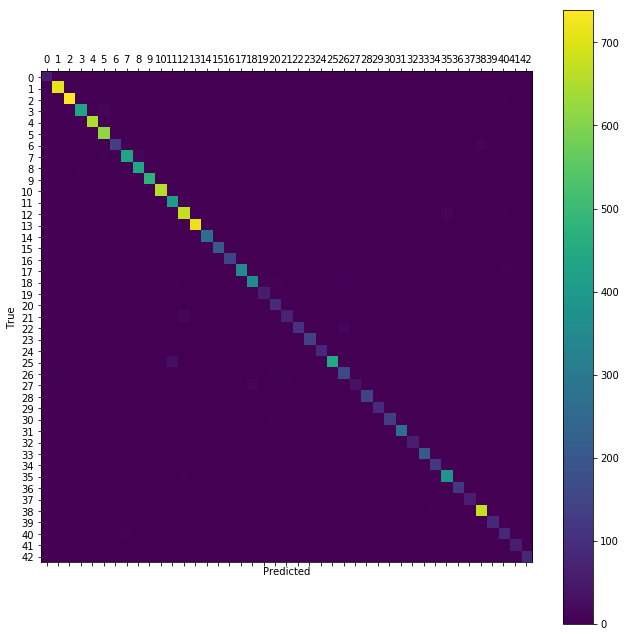

Total Iterations:  40000


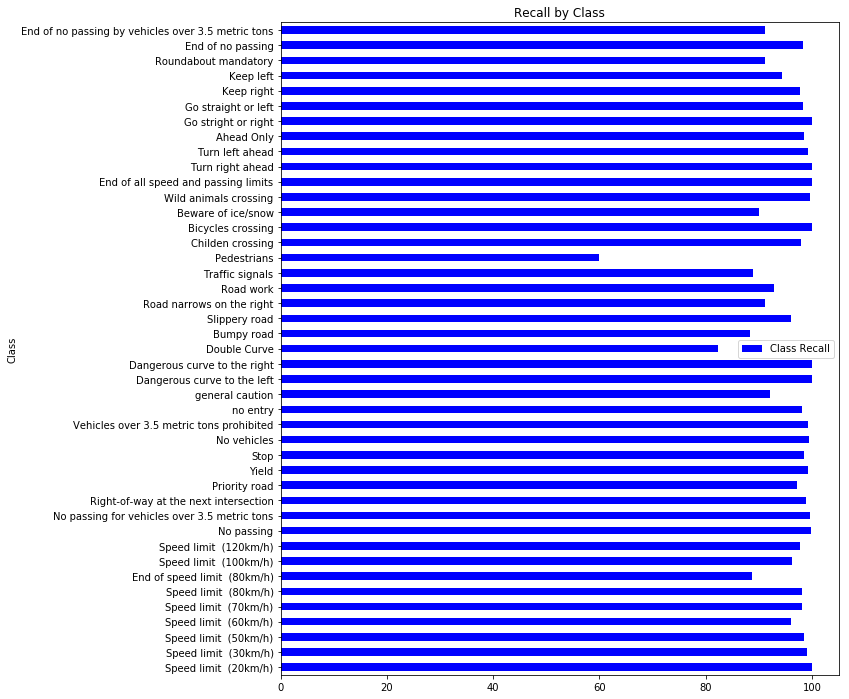

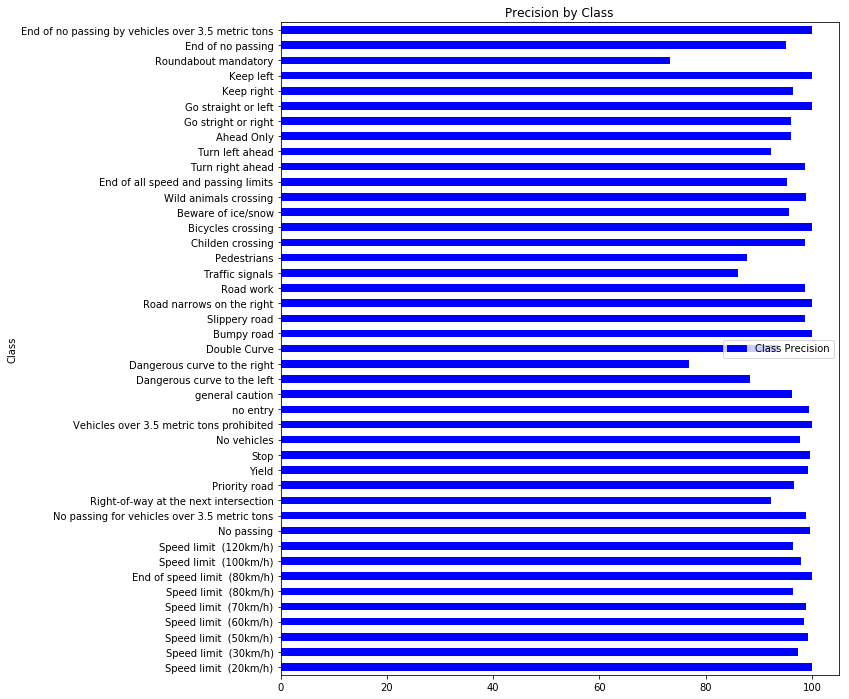

In [133]:
print_test_accuracy(show_confusion_matrix=True, show_class_recall = True, show_class_precision = True)
print("Total Iterations: ", total_iterations)

After 40,000 iterations, the accuracy is at 97.1%.  

Looking at the precision and recall, this model is still struggling with the recall on the pedestrian signs, but it is doind better on the pedestrian signs than the other models. Most of the signs have a recall 90% or above, with several classes at 100%.

Precision is also above 90% for most classes, with about 12 classes achieving 100% precision on the test set.

### Summary

The overall accuracy did not vary greatly among the three architectures that were tried, and achieved a maximum test accuracy ranging from 93.5% to 97.1%.

The adapted VGGNet architecture outperformed the LeNet-5 archtitecture, with both versions resulting in similar scores.  The second version, where I dropped two convolutional layers including a pooling layer, had the highest score of 97.1 % accuracy.  The second version had one less pooling layer, resulting in larger 8 x 8 filtered images as output, and the advantages of this larger output seem to outweight the disadvantages of having two fewer layers.

In [150]:
print('Test Score Results')
print(results.to_string(index=False))

Test Score Results
Iterations  LeNet-5  VGGNet V1  VGGNet V2
       100     18.9       25.6       18.7
      1000     68.9       76.0       82.7
      5000     85.9       89.9       92.4
     10000     90.6       93.3       95.0
     20000     92.9       95.9       96.5
     30000     91.9       95.0       96.5
     40000     93.5       96.4       97.1


### Future Work

There are numerous ways to try to improve the results of the model, the only thing holding it back is training time, as it is part intuition and part trial and error in creating the best-performing model. The two major areas to try to get some performance improvements are in the data preprocessing and in the hyperparameter tuning (architecture design).


For preprocessing, further work could be done to try to increase the amount and quality of the training data.  Collecting more labeled images would be a great help, but there are some additional steps that could be done with the additional data.  First, some of these images can inherently double as an image of the same or another class just by flipping them vertically and/or horizontally.  Flipping the “left turn ahead” sign on the vertical axis creates a “right turn ahead” training image, and flipping the “no vehicles” sign, which is just a white circular sign with a red border, both vertically and horizontally creates new images of the same class.


Another preprocessing step that I suspect would be helpful would be to remove the background of the images, since this is just noise that wastes training resources on information that doesn’t offer any predictive value.
There are other pre-processing steps that may also help, such as histogram equalization to improve even out the contrast and brightness, as well as adding more variance to any generated images in addition to the random rotation I applied.  This can include introducing random brightening and darkening factors and adding a random skew to the image.


Further work on hyperparameter tuning would include trying out different combinations of filter size, number of filters, number of layers, and even the learning rate and training batch size.


### Recommendations

The convolutional networks are all learning the images pretty well given the small size of the data set, however, autonomous cars need an even higher accuracy to be able to safely drive themselves.  

For the 32 x 32 images, the adapted VGGNet works the best when it is trimmed down to 4 convolutional networks with pooling on layers 2 and 4.  The VGGNet should work even better with larger images, since this would allow more convolutional layers without downsampling the images too far.

To achieve the level of accuracy that autonomous driving would need to operate safely, I would recommend using larger images so that more convolutional layers can be used. This will allow for the VGGNet to go deeper than the 32 x 32 images allow, as it was designed to do. I would also recommend obtaining more images, which will allow the network to train for all of the possibilities.